# Исследование продаж компьютерных игр. <a class="tocSkip"> 

 

## Описание проекта. <a class="tocSkip"> 

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.


###### Цель исследования :
Выявить определяющие успешность игры закономерности

###### Ход исследования

Данные о продажах игр- в файле : /datasets/games.csv 


О качестве данных ничего не известно. Поэтому перед проверкой гипотез понадобится обзор данных.

Проверим данные на ошибки и оценим их влияние на исследование. Затем, на этапе предобработки поищем возможность исправить самые критичные ошибки данных.

Таким образом, исследование пройдёт в пять этапов:
    
    
 1. Обзор данных.


 2. Предобработка данных.


 3. Исследовательский анализ данных. 
     
    - Самые популярные платформы (топ-5)
    - Анализ количества выпущенных игр за разные годы.
    - Динамика продаж по платформам. 
    - Определение актуального периода для построения прогноза на 2017 год.
    - Анализ платформ - лидеров по продажам, потенциальной прибыльности.
    - Влияние на продажи внутри одной популярной платформы отзывов пользователей и критиков. 
    - Общее распределение игр по жанрам. 

4. Портрет пользователя каждого региона 
    
    
    • Самые популярные платформы (топ-5). 
    • Самые популярные жанры (топ-5). 
    • Влияние рейтинга ESRB на продажи в отдельном регионе
    
    
5. Проверка гипотез:
    
    
    • Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
    • Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.



# Обзор данных.

In [1]:
#импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import warnings


In [2]:
#убираем системные предупреждения
warnings.filterwarnings('ignore')
#настраиваем отображение колонок (полностью)
pd.set_option('display.max_columns', None)
#настраиваем отображение формата значений
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
#открываем и сохраняем как датафрейм файл с данными:
try:
    # personal path
    df = pd.read_csv('games.csv') 
except:
    # Yandex path
    df = pd.read_csv('/datasets/games.csv')
    

Для удобства зададим несколько функций:

In [4]:
#функция для вывода состава столбцов
def describe_cols(df_data):
    df = df_data
    values = pd.DataFrame()
    
    for col in df.columns:
        values[col] = [df[col].unique(), df[col].dtypes, df[col].nunique()]
        
    return values.transpose().sort_values(by=1, ascending=True).rename(
        {0: 'Значения', 1: 'тип данных', 2: 'Кол-во уникальных значений'}, axis=1)


#функция для вывода пустых значений и их доли в столбцах датафрейма
def nan_values(df_data):
    df = df_data
    count_missing = df.isna().sum()
    percent_missing = round(df.isna().sum() * 100 / len(df), 2)
    
    missing_value_df = pd.DataFrame({'column_name': df.columns,
                                     'num_missing': count_missing,
                                     'percent_missing': percent_missing})
    
    return missing_value_df


#функция для вывода информации о файле
def df_info (df_data):
    print('Количество строк файла:', len(df_data))
    print()
    print('Информация о содержимом файла:')
    display(describe_cols(df_data))
    print()
    print('Информация о пропусках данных:')
    display(nan_values(df_data))
    print()
    print('Первые пять строк таблицы:')
    display(df_data.head())


Рассмотрим подробнее содержимое файла:

In [5]:
df_info (df)

Количество строк файла: 16715

Информация о содержимом файла:


,Значения,тип данных,Кол-во уникальных значений
Year_of_Release,"[2006.0, 1985.0, 2008.0, 2009.0, 1996.0, 1989....",float64,37
NA_sales,"[41.36, 29.08, 15.68, 15.61, 11.27, 23.2, 11.2...",float64,402
EU_sales,"[28.96, 3.58, 12.76, 10.93, 8.89, 2.26, 9.14, ...",float64,307
JP_sales,"[3.77, 6.81, 3.79, 3.28, 10.22, 4.22, 6.5, 2.9...",float64,244
Other_sales,"[8.45, 0.77, 3.29, 2.95, 1.0, 0.58, 2.88, 2.84...",float64,155
Critic_Score,"[76.0, nan, 82.0, 80.0, 89.0, 58.0, 87.0, 91.0...",float64,82
Name,"[Wii Sports, Super Mario Bros., Mario Kart Wii...",object,11559
Platform,"[Wii, NES, GB, DS, X360, PS3, PS2, SNES, GBA, ...",object,31
Genre,"[Sports, Platform, Racing, Role-Playing, Puzzl...",object,12
User_Score,"[8, nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7....",object,96



Информация о пропусках данных:


,column_name,num_missing,percent_missing
Name,Name,2,0.01
Platform,Platform,0,0.00
Year_of_Release,Year_of_Release,269,1.61
Genre,Genre,2,0.01
NA_sales,NA_sales,0,0.00
EU_sales,EU_sales,0,0.00
JP_sales,JP_sales,0,0.00
Other_sales,Other_sales,0,0.00
Critic_Score,Critic_Score,8578,51.32
User_Score,User_Score,6701,40.09



Первые пять строк таблицы:


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,"2,006.00",Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,"1,985.00",Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,"2,008.00",Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,"2,009.00",Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,"1,996.00",Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


**Вывод**

В файле - данные об интернет-трафике клиентов.

Таблица содержит 149396 строк, в столбцах присутствуют пропуски. Причина пропусков - вероятно отсутствие рейтингов и оценок у игр с небольшим объемом продаж.

**Содержание данных:**

 •	`Name` — название игры
 
 •	`Platform` — платформа
 
 •	`Year_of_Release` — год выпуска
 
 •	`Genre` — жанр игры
 
 •	`NA_sales` — продажи в Северной Америке (миллионы проданных копий)
 
 •	`EU_sales` — продажи в Европе (миллионы проданных копий)
 
 •	`JP_sales` — продажи в Японии (миллионы проданных копий)
 
 •	`Other_sales` — продажи в других странах (миллионы проданных копий)
 
 •	`Critic_Score` — оценка критиков (максимум 100)
 
 •	`User_Score` — оценка пользователей (максимум 10)
 
 •	`Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

**Необходимые изменения:**

 - привести наименования столбцов к нижнему регистру
 - проанализировать пропуски (столбцы Name,  Year_of_Release, Genre, Critic_Score, User_Score, Rating) и, если это возможно,- заполнить их данными
 - заменить формат столбца Year_of_Release с float на int (этого достаточно, поскольку нам важен только год), User_Score c object на  float


# Предобработка данных.

## Пропуски значений и ошибки данных

### Приведение названия столбцов к нижнему регистру 

In [6]:
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Функции для использования в анализе

Для наглядности создадим словарь с наименованием и описанием столбцов датафрейма и функцию с вызовом основных характеристик столбца:

In [7]:
# словарь с описанием столбцов
dict_df ={
     'name': 'название игры',
     'platform':'платформа',
     'year_of_release':'год выпуска',
     'genre': 'жанр игры',
     'na_sales': 'продажи в Северной Америке (миллионы проданных копий)',
     'eu_sales':'продажи в Европе (миллионы проданных копий)',
     'jp_sales': 'продажи в Японии (миллионы проданных копий)',
     'other_sales': 'продажи в других странах (миллионы проданных копий)',
     'critic_score': 'оценка критиков (максимум 100)', 
     'user_score': 'оценка пользователей (максимум 10)',
     'rating': 'рейтинг от организации ESRB (англ. Entertainment Software Rating Board)'
}

#словарь со значениями 
dict_name = pd.Series(dict_df)

In [8]:
#просмотр данных столбца: уникальные значения, тип данных, кол-во пропусков
def preprocessing(column):
    print(column, '-', dict_name[column])
    print('тип данных', df[column].dtypes)
    print('количество пропусков',df[column].isna().sum())
    if df[column].dtypes != 'object':
        print('минимальное значение:',df[column].min(), 'максимальное значение:', df[column].max() )
    print()
    print('уникальные значения:', '\n', df[column].value_counts())
    

### Столбцы name и genre

In [9]:
preprocessing('name')

name - название игры
тип данных object
количество пропусков 2

уникальные значения: 
 Need for Speed: Most Wanted                         12
Ratatouille                                          9
LEGO Marvel Super Heroes                             9
FIFA 14                                              9
Madden NFL 07                                        9
                                                    ..
Jewels of the Tropical Lost Island                   1
Sherlock Holmes and the Mystery of Osborne House     1
The King of Fighters '95 (CD)                        1
Megamind: Mega Team Unite                            1
Haitaka no Psychedelica                              1
Name: name, Length: 11559, dtype: int64


In [10]:
preprocessing('genre')

genre - жанр игры
тип данных object
количество пропусков 2

уникальные значения: 
 Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: genre, dtype: int64


In [11]:
df.loc[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,"1,993.00",NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,"1,993.00",NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


В данных, которые содержат столбцы, одновременно 2 пропуска значений (нет названия игры и жанра) в строках 659 и 14244. Ввиду незначительности их количества строк удалим эти строки:

In [12]:
df.drop(index = [659, 14244], inplace = True)
df.loc[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


***Вывод***

Удалены две строки с пропусками значений в обоих столбцах - name и genre

### Столбец platform

In [13]:
preprocessing('platform')

platform - платформа
тип данных object
количество пропусков 0

уникальные значения: 
 PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: platform, dtype: int64


***Вывод***

Нет явных проблем в данных столбца, пропусков также нет.

### Столбец year_of_release

In [14]:
preprocessing('year_of_release')

year_of_release - год выпуска
тип данных float64
количество пропусков 269
минимальное значение: 1980.0 максимальное значение: 2016.0

уникальные значения: 
 2,008.00    1427
2,009.00    1426
2,010.00    1255
2,007.00    1197
2,011.00    1136
2,006.00    1006
2,005.00     939
2,002.00     829
2,003.00     775
2,004.00     762
2,012.00     653
2,015.00     606
2,014.00     581
2,013.00     544
2,016.00     502
2,001.00     482
1,998.00     379
2,000.00     350
1,999.00     338
1,997.00     289
1,996.00     263
1,995.00     219
1,994.00     121
1,993.00      60
1,981.00      46
1,992.00      43
1,991.00      41
1,982.00      36
1,986.00      21
1,989.00      17
1,983.00      17
1,990.00      16
1,987.00      16
1,988.00      15
1,985.00      14
1,984.00      14
1,980.00       9
Name: year_of_release, dtype: int64


В столбце 269 пропусков, -1,61% от общей массы значений. Год релиза в дальнейшем исследовании имеет значение ,поэтому удалим их:

In [15]:
df.dropna(subset=['year_of_release'], inplace = True)
df.query('year_of_release.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


***Вывод***

Удалены строки с пропусками значений столбца year_of_release

### Столбцы na_sales, eu_sales, jp_sales, other_sales

In [16]:
preprocessing('na_sales')

na_sales - продажи в Северной Америке (миллионы проданных копий)
тип данных float64
количество пропусков 0
минимальное значение: 0.0 максимальное значение: 41.36

уникальные значения: 
 0.00     4449
0.02      562
0.03      554
0.04      543
0.05      536
         ... 
5.39        1
3.03        1
3.56        1
2.82        1
41.36       1
Name: na_sales, Length: 401, dtype: int64


In [17]:
preprocessing('eu_sales')

eu_sales - продажи в Европе (миллионы проданных копий)
тип данных float64
количество пропусков 0
минимальное значение: 0.0 максимальное значение: 28.96

уникальные значения: 
 0.00     5766
0.01     1467
0.02     1290
0.03      911
0.04      702
         ... 
1.52        1
5.75        1
2.17        1
2.78        1
28.96       1
Name: eu_sales, Length: 307, dtype: int64


In [18]:
preprocessing('jp_sales')

jp_sales - продажи в Японии (миллионы проданных копий)
тип данных float64
количество пропусков 0
минимальное значение: 0.0 максимальное значение: 10.22

уникальные значения: 
 0.00    10300
0.02      733
0.01      697
0.03      540
0.04      391
        ...  
3.14        1
2.73        1
3.18        1
3.63        1
0.97        1
Name: jp_sales, Length: 244, dtype: int64


In [19]:
preprocessing('other_sales')

other_sales - продажи в других странах (миллионы проданных копий)
тип данных float64
количество пропусков 0
минимальное значение: 0.0 максимальное значение: 10.57

уникальные значения: 
 0.00    6492
0.01    3398
0.02    1596
0.03     910
0.04     641
        ... 
2.11       1
7.53       1
1.21       1
1.79       1
0.93       1
Name: other_sales, Length: 155, dtype: int64


***Вывод*** 

В столбцах нет особенностей, на которые нужно обратить внимание на этапе предобработки

### Столбец critic_score

In [20]:
preprocessing('critic_score')

critic_score - оценка критиков (максимум 100)
тип данных float64
количество пропусков 8461
минимальное значение: 13.0 максимальное значение: 98.0

уникальные значения: 
 70.00    252
71.00    248
75.00    240
80.00    235
73.00    234
        ... 
20.00      3
29.00      3
21.00      1
17.00      1
13.00      1
Name: critic_score, Length: 81, dtype: int64


***Вывод***

Пропуски значений столбца 'critic_score' оставлены без изменений во избежание искажения результатов корреляционного анализа и стат-тестов

### Столбец user_score

In [21]:
preprocessing('user_score')

user_score - оценка пользователей (максимум 10)
тип данных object
количество пропусков 6605

уникальные значения: 
 tbd    2376
7.8     322
8       285
8.2     276
8.3     252
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64


Поскольку значение tbd не означает наличие оценки пользователя, заменим ее на пропуск (nan), пропуски оставим незаполненными, чтобы впоследствии не исказить. 

In [22]:
df.loc[df['user_score'] == 'tbd', 'user_score'] = float('nan')

***Вывод***

Значения столбца 'user_score' , равные tbd, заменены на nan (пропуски)

Пропуски значений оставлены без изменений во избежание искажений результатов корреляционного анализа и стат-тестов


### Столбец rating

In [23]:
preprocessing('rating')


rating - рейтинг от организации ESRB (англ. Entertainment Software Rating Board)
тип данных object
количество пропусков 6676

уникальные значения: 
 E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64


Заменим пропуски на значение 'without rating':

In [24]:
df['rating'] = df['rating'].fillna('without rating')
preprocessing('rating')

rating - рейтинг от организации ESRB (англ. Entertainment Software Rating Board)
тип данных object
количество пропусков 0

уникальные значения: 
 without rating    6676
E                 3921
T                 2905
M                 1536
E10+              1393
EC                   8
K-A                  3
AO                   1
RP                   1
Name: rating, dtype: int64


***Вывод***

Пропуски значений столбца  rating заменены на значение 'without rating'

## Замена типа данных

Меняем формат столбца year_of_release c float на int (поскольку нам нужно только значение года, смысла в преобразованиях в дату нет)

In [25]:
df['year_of_release'] = df['year_of_release'].astype(int)
df['year_of_release'].head()

0    2006
1    1985
2    2008
3    2009
4    1996
Name: year_of_release, dtype: int32

Заменим тип данных столбца user_score на float:

In [26]:
df['user_score'] = df['user_score'].astype(float)

Проверим внесение изменений:

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.4+ MB


***Вывод***

Заменен формат значений в столбце year_of_release и user_score

## Проверка данных на дубликаты

In [28]:
#проверка файлов на дубликаты:
df.duplicated().sum()

0

Дубикаты данных отсутствуют.

## Подсчет суммарных продаж во всех регионах  

In [29]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [30]:
df['total_sales'].head()

0   82.54
1   40.24
2   35.52
3   32.77
4   31.38
Name: total_sales, dtype: float64

## Вывод по разделу 2



В результате предобработки данных:

 - наименования стоблцов приведены к нижнему регистру
 - удалены строки с пропусками данных в столбцах name и rating (2 строки), year_of_release (269 строк)
 - значения user_score, равные 'tbd' (To Be Determined) изменено на пропуски значений (значение nan)
 - пропуски значений столбца  rating заменены на значение 'without rating'
 - подсчитаны и сохранены в столбце total_sales суммарные продажи во всех регионах.   


Пропуски значений столбца user_score и critic_score оставлены без изменений во избежание искажений результатов корреляционного анализа и стат-тестов.

Данные готовы к анализу.

# Исследовательский анализ данных.



## Анализ количества выпущенных игр за разные годы.


Сгруппируем количество выпущенных игр по годам релиза:

In [31]:
games_year = df.groupby('year_of_release')[['name']].agg('count').reset_index()
games_year.columns = ['year_of_release', 'count_of_games']
games_year

,year_of_release,count_of_games
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


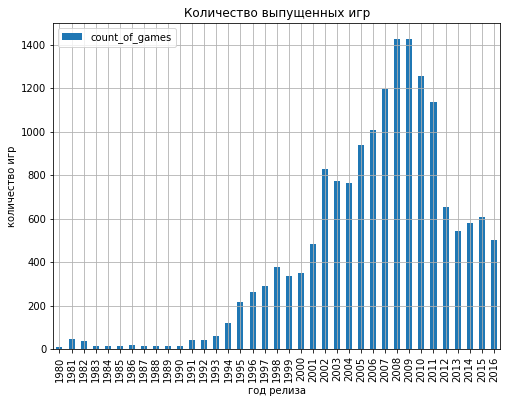

In [32]:
games_year.plot.bar( x = 'year_of_release', y = 'count_of_games', grid=True, title='Количество выпущенных игр',
                   figsize=(8,6)).set(xlabel='год релиза', ylabel='количество игр');

Как видно из диаграммы, количество выпущенных игр до 1990 года было незначительным. В 90-е годы, когда в компьютерные игры вошли инновации в виде перехода к 3-Д графике и т.д., появились нескольких новых игровых жанров, количество выпускаемых игр стало расти и достигло своего максимума в 2008-2009 году, затем мы наблюдаем количественный спад - к 2016 году он оказался на уровне 2001 года.

Данные до 90-х годов несущественны для анализа, поскольку занимают ничтожную часть от последующих данных, в дальнейшем мы не будем использовать их для исследования:

In [33]:
#отсечем данные до 1991 года
df = df.query('year_of_release > 1990')
df['year_of_release'].min()

1991

**Вывод**

Рынок компьютерных игр начал расти в начале 90-х и достиг своего пика в 2008-2009 годах. С тех пор наблюдается его спад по 2016 год включительно. Возможно из-за пресыщения , возможно из-за отсутствия существенных инноваций, которые дали бы толчок развитию нового скачка.

Данные до 90-х годов несущественны для анализа, поскольку занимают ничтожную часть от последующих данных, в дальнейшем мы не будем использовать их для исследования.

## Анализ игр в разрезе платформ. Самые популярные платформы (топ-5). Динамика продаж.


**Все платформы**

Сгруппируем игры по платформам и посмотрим количество игр и объемы продаж:

In [34]:
platform_year = df.groupby('platform')['total_sales'].agg(['count', 'sum']
                                    ).sort_values(by='sum', ascending = False).reset_index()
platform_year.columns = ['platform', 'game_of_platform_count', 'game_of_platform_sales' ]
platform_year

,platform,game_of_platform_count,game_of_platform_sales
0,PS2,2127,"1,233.56"
1,X360,1232,961.24
2,PS3,1306,931.34
3,Wii,1286,891.18
4,DS,2120,802.76
5,PS,1190,727.58
6,PS4,392,314.14
7,GBA,811,312.88
8,PSP,1193,289.53
9,3DS,512,257.81


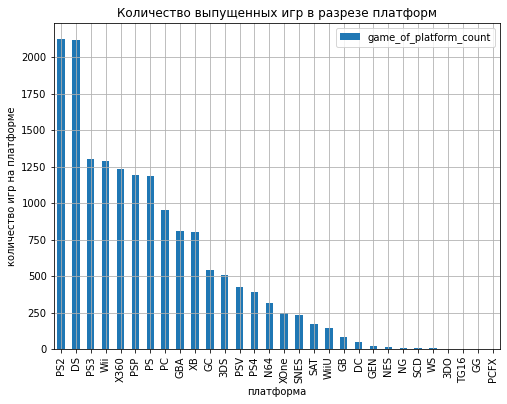

In [35]:
#количество игр на платформах
platform_year.sort_values(by =  'game_of_platform_count', ascending= False).plot.bar(
                    x = 'platform', y = 'game_of_platform_count', grid=True, 
                    title='Количество выпущенных игр в разрезе платформ',
                    figsize=(8,6)).set(xlabel='платформа', ylabel='количество игр на платформе');

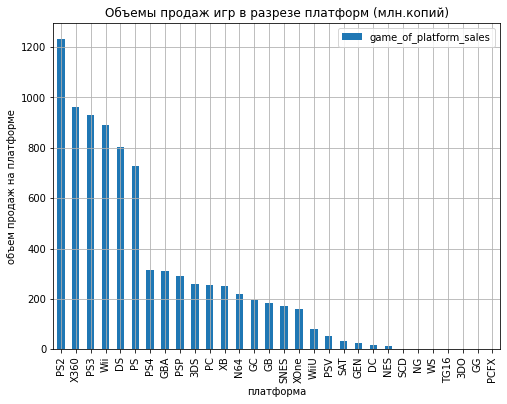

In [36]:
#объемы продаж по платформам
platform_year.plot.bar(
                    x = 'platform', y = 'game_of_platform_sales', grid=True, 
                    title='Объемы продаж игр в разрезе платформ (млн.копий)',
                    figsize=(8,6)).set(xlabel='платформа', ylabel='объем продаж на платформе');

Посмотрим на объемы продаж в процентном соотношении:

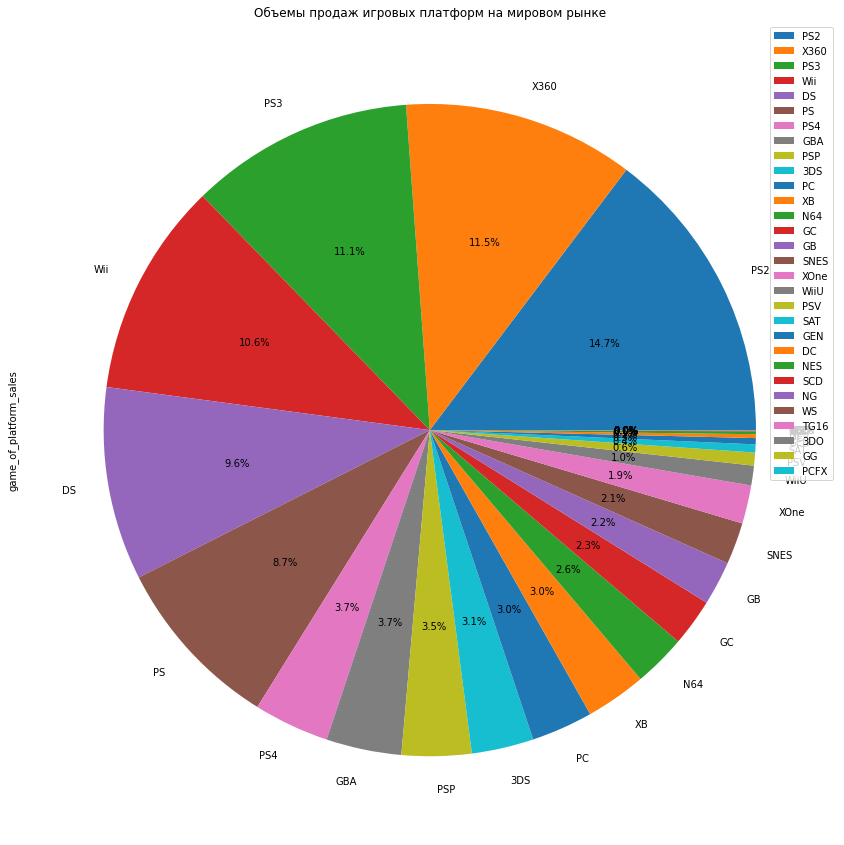

In [37]:
platform_year.plot(kind = 'pie', y ='game_of_platform_sales', autopct='%1.1f%%', figsize= (15,15),
                         title = 'Объемы продаж игровых платформ на мировом рынке', labels = platform_year['platform']
                         );

Отчетливо видны 6 платформ-лидеров продаж: PS, PS2, PS3 (игровые приставки Sony PlayStation), DS (карманные игровые консоли Nintendo), Wii (игровая консоль Nintendo), X360 (игровые приставки Microsoft). То есть наиболее успешные платформы принадлежат трем компаниями: 34,5% продаж - у Sony , 20.2% - Nintendo, 11.5% - Microsoft.
Они же -лидеры по количеству выпущенных игр. Но если посмотреть на график распределения количества выпущенных игр в разрезе платформ, то увидим, что на том же уровне рядом с платформами-лидерами - PSP (портативная игровая консоль Sony PlayStation), но по объемам продаж она далеко позади.


**Рассмотрим подробнее топ-5 платформ:**

In [38]:
# топ-5 по объемам продаж:
top_platforms = platform_year.head(5)['platform']
top_platforms

0     PS2
1    X360
2     PS3
3     Wii
4      DS
Name: platform, dtype: object

In [39]:
#сгруппируем топ платформ по годам релиза:
top = df.query('platform in @top_platforms').pivot_table(
                       index='year_of_release', columns = 'platform', 
                       values = 'total_sales', aggfunc = 'sum')
top

platform,DS,PS2,PS3,Wii,X360
year_of_release,,,,,
2000,NaN,39.17,NaN,NaN,NaN
2001,NaN,166.43,NaN,NaN,NaN
2002,NaN,205.38,NaN,NaN,NaN
2003,NaN,184.31,NaN,NaN,NaN
2004,17.27,211.81,NaN,NaN,NaN
2005,130.14,160.66,NaN,NaN,8.25
2006,119.81,103.42,20.96,137.15,51.62
2007,146.94,75.99,73.19,152.77,95.41
2008,145.31,53.90,118.52,171.32,135.26


(2000.0, 2016.0)

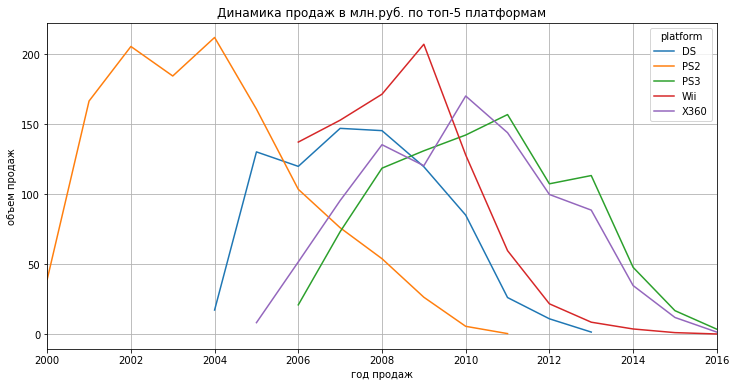

In [40]:
top.plot(grid=True, figsize=(12, 6), title = 'Динамика продаж в млн.руб. по топ-5 платформам').set(
                                     xlabel = 'год продаж', ylabel = 'объем продаж');
plt.xlim(2000, 2016)

In [41]:
top.describe()

platform,DS,PS2,PS3,Wii,X360
count,10.00,12.00,11.00,11.00,12.00
mean,80.28,102.80,84.67,81.02,80.10
std,59.80,79.41,54.64,79.14,57.48
min,1.54,0.45,3.60,0.18,1.52
25%,19.50,35.98,34.36,6.17,29.05
50%,102.28,89.70,107.36,59.65,92.00
75%,127.56,170.90,124.72,144.96,124.03
max,146.94,211.81,156.78,206.97,170.03


Визуализируем результат по топам:

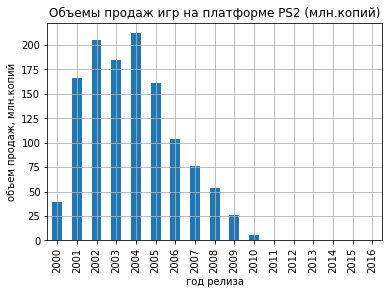

In [42]:
top['PS2'].plot.bar(
                    x = 'year_of_release', y = 'total_sales', grid=True, 
                    title='Объемы продаж игр на платформе PS2 (млн.копий)'
                    ).set(xlabel='год релиза', ylabel='объем продаж, млн.копий');

PS2 -абсолютный лидер по количеству выпущенных игр и объемам продаж за все свое существование. Популярность пришла черех год, пик продаж пришелся на 2001-2005 годы, начиная с 2005 года- спад.

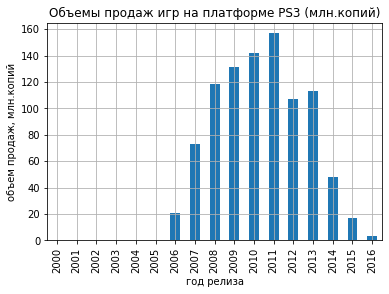

In [43]:
top['PS3'].plot.bar(
                    x = 'year_of_release', y = 'total_sales', grid=True, 
                    title='Объемы продаж игр на платформе PS3 (млн.копий)'
                    ).set(xlabel='год релиза', ylabel='объем продаж, млн.копий');

Последователь PS2 - PS3 подхватил ее эстафету, с 2007 года виден рост продаж , пик пришелся на 2008-2013 годы, затем быстрый спад.

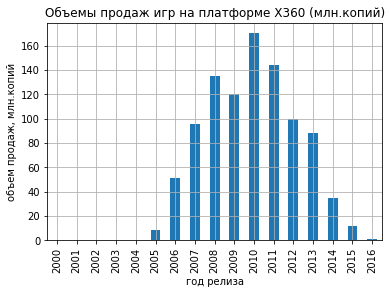

In [44]:
top['X360'].plot.bar(
                    x = 'year_of_release', y = 'total_sales', grid=True, 
                    title='Объемы продаж игр на платформе X360 (млн.копий)'
                    ).set(xlabel='год релиза', ylabel='объем продаж, млн.копий');

Альтернативная платформа производства Microsoft - X360, выпущенная параллельно с PS3, с 2006 года резко набирает обороты и достигает пика популярности в 2008-2011 годах.

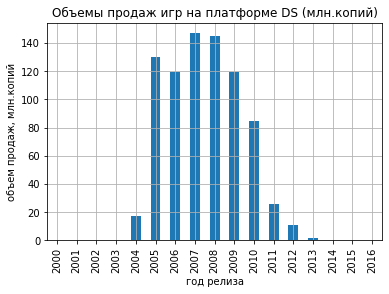

In [45]:
top['DS'].plot.bar(
                    x = 'year_of_release', y = 'total_sales', grid=True, 
                    title='Объемы продаж игр на платформе DS (млн.копий)'
                    ).set(xlabel='год релиза', ylabel='объем продаж, млн.копий');

Самая ранняя из исследуемых платформ DS -резкий рост продаж через год, пик в 2005-2009 годах - и спад.

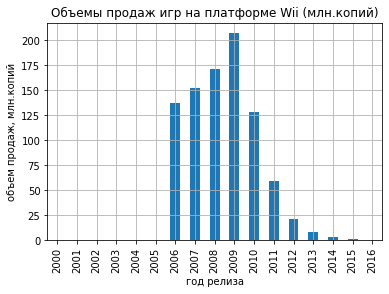

In [46]:
top['Wii'].plot.bar(
                    x = 'year_of_release', y = 'total_sales', grid=True, 
                    title='Объемы продаж игр на платформе Wii (млн.копий)'
                    ).set(xlabel='год релиза', ylabel='объем продаж, млн.копий');

У второй платформы от Nintendo - Wii,- резкий всплеск продаж в первый же год, пик длиной в 5 лет и резкий спад.

Для охвата наибольшей аудитории, на консоль была поставлена цена в 200 долл., в  отличии от Xbox 360 и PS3 за 300 и 500 соответственно. В кризис 2008 года, Wii была спасением для многих семей. Упор в консоли был сделан на казуальных игроков — Nintendo хотела чтобы их консоль была у всех, от детей до бабушек. Консоль была сделана по принципу «дорогой игрушки», было представлено множество не особо нужных, но необычных технологий в Wii Mote, например, motion control, который идеально использовался во всех играх самой Nintendo и в тонне party-ориентированных игр: Wii sports, Mario Kart, Mario Party и многие другие. Поэтому, Wii была в домах даже людей никак не связанными с играми. 

Такой он, маркетинг)  А платформа в лучшие свои годы стала лидером продаж наравне с PS2.

Посчитаем средний срок жизни платформы исходя из данных по пяти топам:

In [47]:
#средний срок жизни платформы
sum_pl = 0
count_pl = 0
for name in top.columns:
    sum_pl += top.loc[top[name].notna(), name].count()
    count_pl += 1
print('Среднее время жизни платформы', sum_pl/count_pl)   

Среднее время жизни платформы 11.2


**Вывод** 

Как можно заметить, полный цикл жизни платформы (на примере топ-5) составляет в среднем 11 лет. Распределение несколько отличается и зависит, скорее всего, от периода, в котором платформа была запущена и скорости разработки новых платформ с инновациями. Но мы видим закономерность- резкий всплеск продаж через год, 5-летний (в среднем) пик, и спад, растянутый на 4-5 лет.


Топ-5 платформ за исследуемое время : PS2, X360, PS3, Wii, DS. Это платформы тройки лидеров- Sony, Nintendo и Microsoft.

## Определение актуального периода для построения прогноза на 2017 год.


Для прогноза перспективной платформы нужно понимать характер поведения платформы в процессе ее развития. Мы рассмотрели поведение 5 топовых платформ, а поведение менее успешных может оказаться немного другим: например, ввиду отсутствия достаточного бюджета ее раскрутка будет длиться дольше, а срок ее жизни будет меньше. Можно предположить, что у топовая платформа  может себе позволить дольше держаться на плаву и "хвост" справа на диаграмме у нее будет длиннее. Поскольку на рынке 30 платформ, то чтобы приблизиться к реальности, посчитаем средний срок жизни платформы исходя из всего набора данных:

In [48]:
#суммарные продажи в год 
report = df.groupby(['platform', 'year_of_release']).agg({'total_sales':'sum'}).reset_index()
print('Среднее время жизни платформы', report.groupby('platform').agg({'year_of_release':'nunique'}).mean())

Среднее время жизни платформы year_of_release   7.07
dtype: float64


 Исходя из полученного среднего срока жизни платформы в 7 лет, установим актуальным периодом 2010-2016 годы и сохраним  данные за эти годы в отдельной переменной df_actual:.
 
***Примечание:*** если взять меньшее количество лет, то непонятно в какой стадии находится конкретная платформа: она "молодая" или уже заканчивает свое существование, в дальнейшем  этот момент мы используем при выборе перспективной платформы в том числе исходя из стадии ее "жизни"

In [49]:
df_actual = df.query('year_of_release >= 2010')
df_actual.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.00,6.30,E,21.82
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.00,8.20,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.00,8.10,M,16.27
27,Pokemon Black/Pokemon White,DS,2010,Role-Playing,5.51,3.17,5.65,0.80,NaN,NaN,without rating,15.13
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.00,3.40,M,14.73


**Вывод**

Актуальным периодом для определения прогноза наиболее перспективной платформы определим 2010-2016 годы.

## Анализ платформ - лидеров по продажам, потенциальной прибыльности.


Визуализируем игровой рынок платформ, которые нам будут интересны для прогноза -то есть те, кто еще продается в 2016 году и построим боксплот за актуальный период:

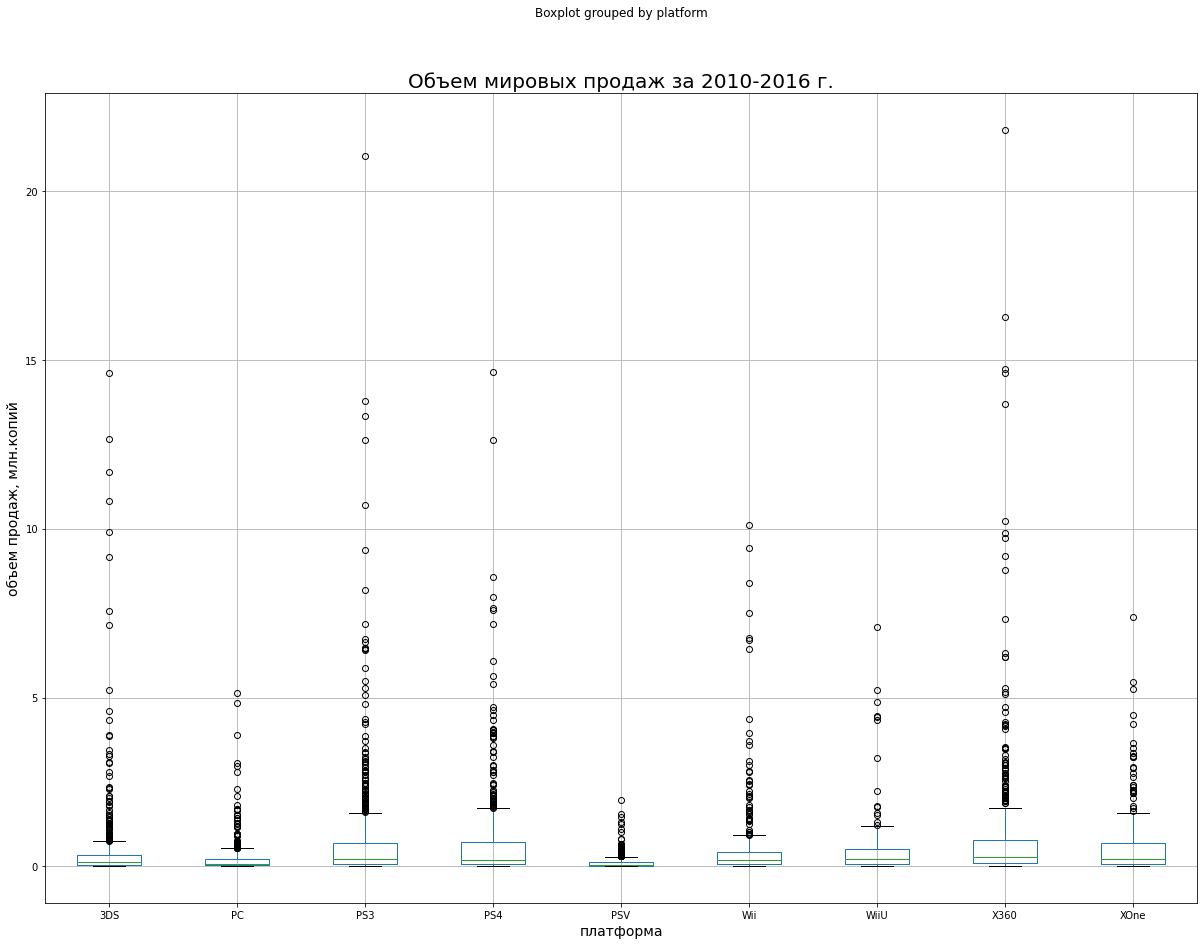

In [50]:
#диаграмма разброса по актуальным платформам (по 'сырым' данным)
#список "живых" в 2016 году платформ:
actual_platform = ['3DS', 'PC', 'PS3', 'PS4', 'PSV', 'Wii', 'WiiU', 'X360', 'XOne']

#применим к базе актуального периода фильтр с актуальными платформами:
df_actual.query('platform in @actual_platform').boxplot(
                column='total_sales', by='platform', figsize=(20, 15))
plt.title('Объем мировых продаж за 2010-2016 г.', size=20)
plt.xlabel('платформа', size=14)
plt.ylabel('объем продаж, млн.копий', size=14)
plt.show()

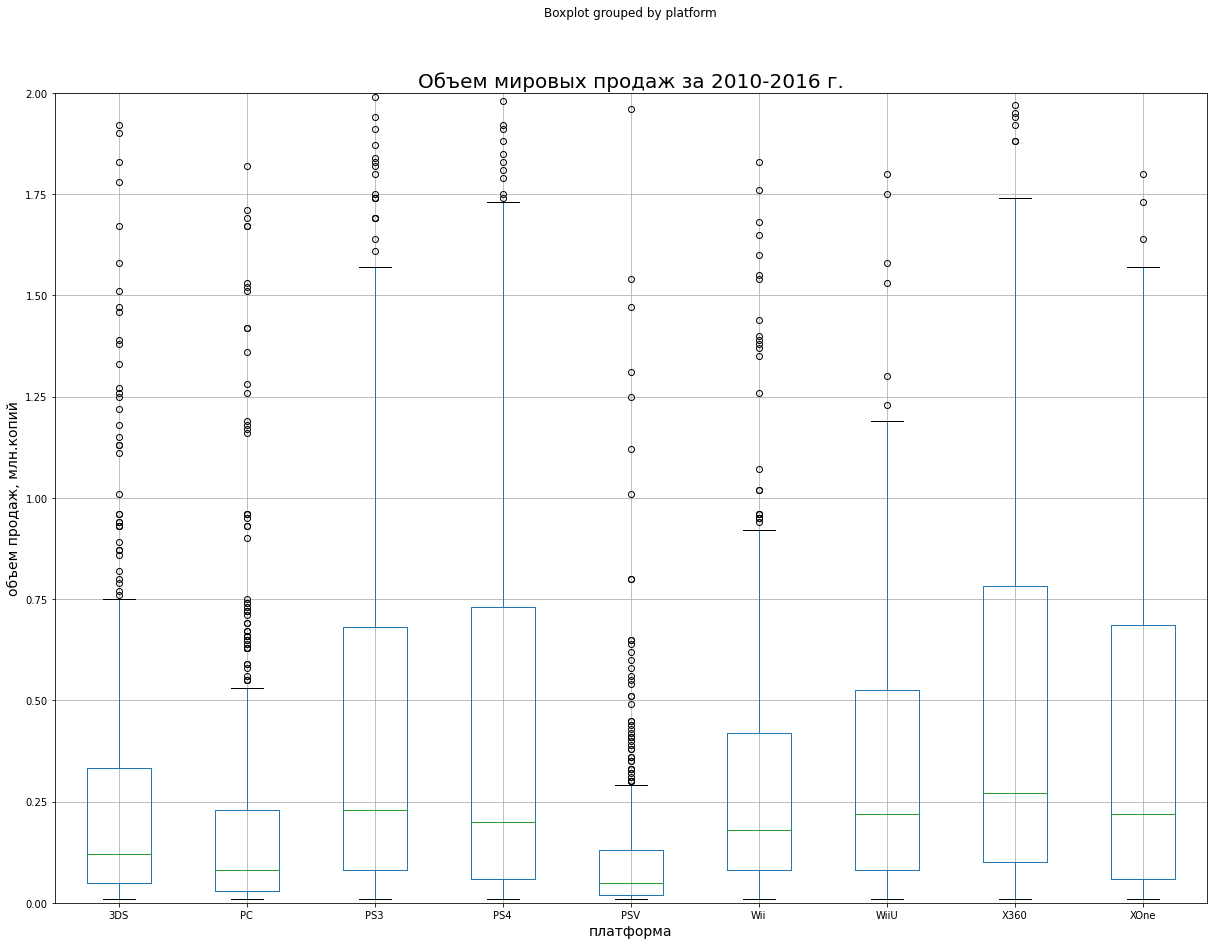

In [51]:
#..и рассмотрим поближе область ящика:
df_actual.query('platform in @actual_platform').boxplot(
                column='total_sales', by='platform', figsize=(20, 15)).set(ylim=(0,2))
plt.title('Объем мировых продаж за 2010-2016 г.', size=20)
plt.xlabel('платформа', size=14)
plt.ylabel('объем продаж, млн.копий', size=14)
plt.show()

Боксплот показывает распределение продаж между платформами в 2010-2016 годы. Мы видим, что самое большое медианное значение  и длинный "верхний" хвост -у Х360, PS3, PS4, XOne - их продажи достигали в лучшее время свыше 20 млн копий. Но чтобы определить, какая платформа на перспективу подходит нам больше всего, посмотрим на общую динамику продаж в разрезе лет.

Сгруппируем данные по годам и  платформам, и сразу отсечем тех, кто уже не продается на рынке в 2016 году (используем список actual_platform):

Примечание: На графике 7 последних лет мы увидим, кто остался в живых на момент исследования. Посмотрим, в какой стадии находится каждая платформа и на какие обратить внимание. 

In [52]:
df_actual_pivot = df_actual.query('platform in @actual_platform').pivot_table(
                       index='year_of_release', columns = 'platform', 
                       values = 'total_sales', aggfunc = 'sum')
df_actual_pivot

platform,3DS,PC,PS3,PS4,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,
2010,NaN,24.28,142.17,NaN,NaN,127.95,NaN,170.03,NaN
2011,63.20,35.03,156.78,NaN,4.63,59.65,NaN,143.84,NaN
2012,51.36,23.22,107.36,NaN,16.19,21.71,17.56,99.74,NaN
2013,56.57,12.38,113.25,25.99,10.59,8.59,21.65,88.58,18.96
2014,43.76,13.28,47.76,100.00,11.90,3.75,22.03,34.74,54.07
2015,27.78,8.52,16.82,118.90,6.25,1.14,16.35,11.96,60.14
2016,15.14,5.25,3.60,69.25,4.25,0.18,4.60,1.52,26.15


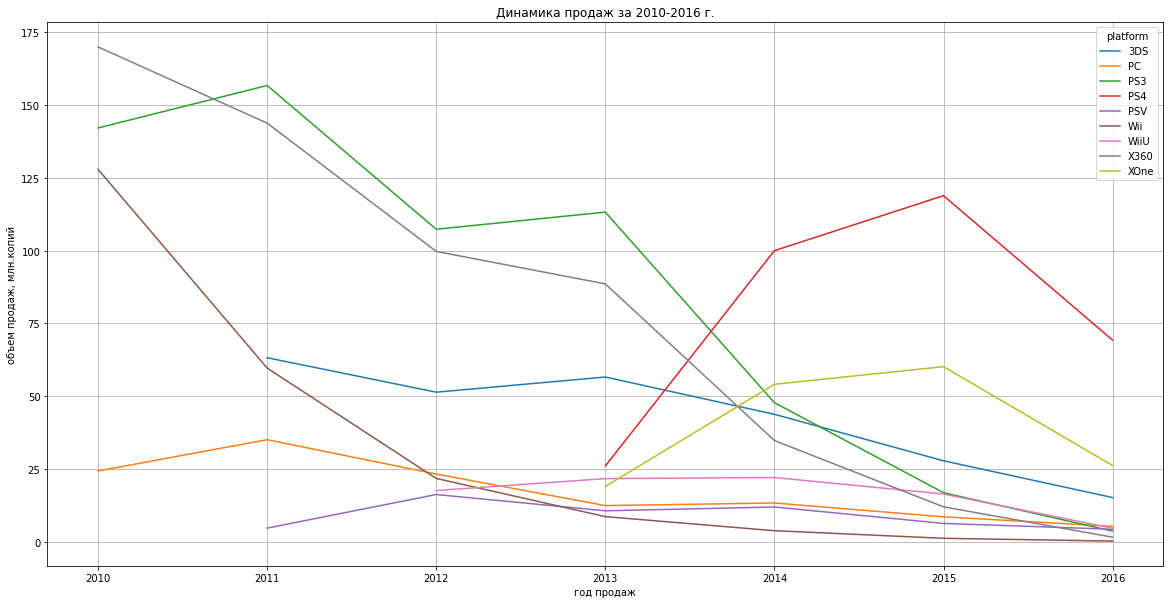

In [53]:
df_actual_pivot.plot(grid=True, figsize=(20, 10), title = 'Динамика продаж за 2010-2016 г.').set(
                                     xlabel = 'год продаж', ylabel = 'объем продаж, млн.копий');


In [54]:
df_actual_pivot.describe()

platform,3DS,PC,PS3,PS4,PSV,Wii,WiiU,X360,XOne
count,6.00,7.00,7.00,4.00,6.00,7.00,5.00,7.00,4.00
mean,42.97,17.42,83.96,78.53,8.97,31.85,16.44,78.63,39.83
std,18.28,10.49,61.06,40.57,4.73,47.24,7.07,65.15,20.31
min,15.14,5.25,3.60,25.99,4.25,0.18,4.60,1.52,18.96
25%,31.77,10.45,32.29,58.44,5.04,2.44,16.35,23.35,24.35
50%,47.56,13.28,107.36,84.62,8.42,8.59,17.56,88.58,40.11
75%,55.27,23.75,127.71,104.72,11.57,40.68,21.65,121.79,55.59
max,63.20,35.03,156.78,118.90,16.19,127.95,22.03,170.03,60.14



К концу 2016 года на рынке осталось 9 игроков.

Наши топы , которых мы рассматривали ранее, уже отжили свое (помним про средний срок жизни платформы), их продажи стремятся к нулю. Обратим внимание тех, кто находится наверху продаж мирового рынка в конце 2016 года: PS4 (красная линия) - 69.25 млн., XOne (салатовая линия ниже) -26.15 млн. и 3DS (синяя линия ниже XOne) - 15.4 млн.


Эти платформы относительно молоды (3-5 лет), свой пик они уже прошли и не показывают потенциальных перспектив роста продаж, но их продажи пока выше остальных и какое-то время они способны продержаться на плаву и заполнить нишу на рынке игровых платформ, ведь геймеры никуда не делись. Мы не видим платформ моложе либо с тенденцией роста к концу 2016 года, поэтому есть смысл сделать ставки на эти три: большинство крупных проектов подошли к своему завершению, и между ними и новыми разработками, которые возможно скоро появятся на рынке, будет явный провал, который надо переждать для "поддержания штанов"


**Вывод**

Согласно представленным данным к концу 2016 года игровой рынок находится на спаде (возможно они неполные, но в условии задания об этом нет информации). Перспективных новых платформ, которые показывали бы тенденцию к росту, нет, поэтому стоит остановиться на тех, кто относительно молод и показывает наибольшие из имеющихся объемы продаж: PS4 - 69.25 млн., XOne -26.15 млн. и 3DS - 15.4 млн. До появления новой платформы они позволят магазину поддерживать бюджет.


## Влияние на продажи внутри одной популярной платформы отзывов пользователей и критиков.


Рассчитаем коэффициенты корреляции между объемом продаж и отзывами пользователей и критиков на актуальных в 2016 году платформах за актуальный период 2010-2016г (df_actual):

In [55]:
# построим сводную таблицу значения коэффициента коррелияции на разных платформах
actual_platform_corr = platform_year.query('platform in @actual_platform')
actual_platform_corr['user_corr'] = 0
actual_platform_corr['critic_corr'] = 0

#рассчитаем коэффициент корреляции
for name in actual_platform_corr['platform']:
    actual_platform_corr.loc[actual_platform_corr['platform'] == name,['user_corr']] = df_actual.query(
                 'platform == @name')['total_sales'].corr(df_actual.query('platform == @name')['user_score']).round(2)
    
    actual_platform_corr.loc[actual_platform_corr['platform'] == name,['critic_corr']] = df_actual.query(
                 'platform == @name')['total_sales'].corr(df_actual.query('platform == @name')['critic_score']).round(2)
actual_platform_corr

,platform,game_of_platform_count,game_of_platform_sales,user_corr,critic_corr
1,X360,1232,961.24,0.07,0.34
2,PS3,1306,931.34,0.07,0.40
3,Wii,1286,891.18,0.15,0.31
6,PS4,392,314.14,-0.03,0.41
9,3DS,512,257.81,0.22,0.35
10,PC,955,255.69,-0.01,0.34
16,XOne,247,159.32,-0.07,0.42
17,WiiU,147,82.19,0.40,0.35
18,PSV,429,53.81,0.01,0.13


Судя по коэффициенту корреляции между продажами и пользовательскими оценками связь отсутствует, можно говорить о ее существовании только в отношении WiiU. А вот оценка критиков сильнее воздействует на объемы продаж, хотя о сильной зависимости говорить нет оснований, тем не менее это всегда 30-40% за исключением PSV.

Рассмотрим подробнее зависимость продаж от оценок пользователей на актуальных в 2016 году платформах. Для построения диаграмм также возьмем данные за актуальный период (2010-2016):

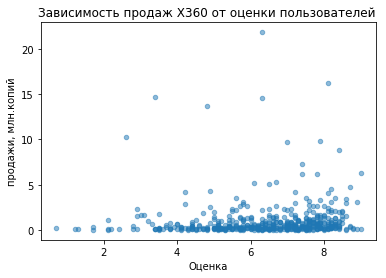

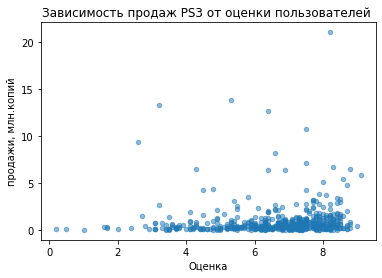

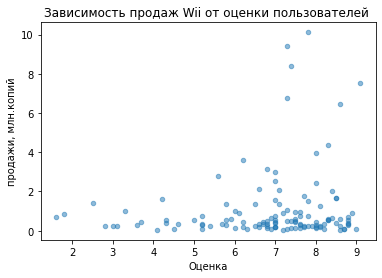

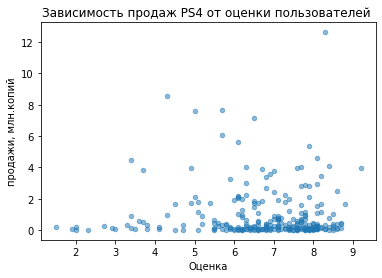

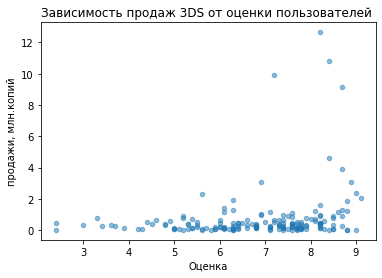

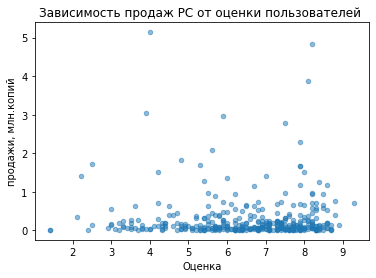

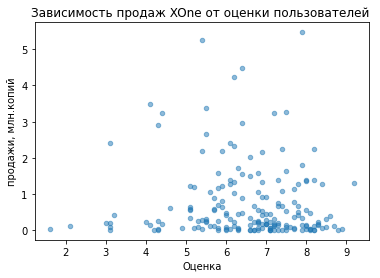

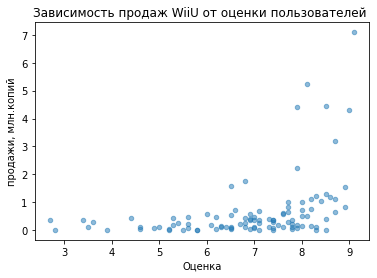

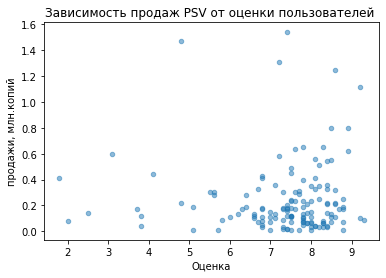

In [56]:
for name in actual_platform_corr['platform']:
    df_actual.query('platform == @name').plot(x='user_score', y='total_sales', kind='scatter', alpha=0.5,
                       title=f'Зависимость продаж {name} от оценки пользователей ').set(
                       xlabel='Оценка', ylabel='продажи, млн.копий');
    

На диаграмме рассеяния видно, что плотность продаж выше в областях графика с высокой оценкой и практически везде в этой части есть выбросы с продажами максимально большого количества копий.  


То же сделаем для оценок критиков:

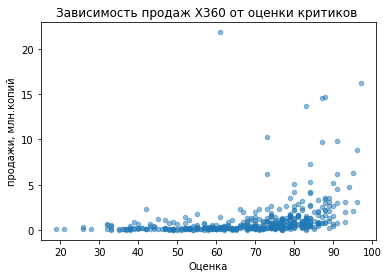

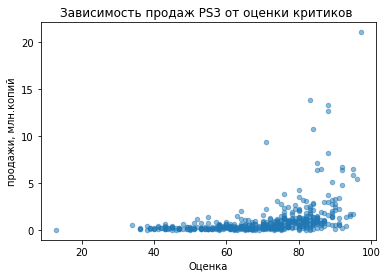

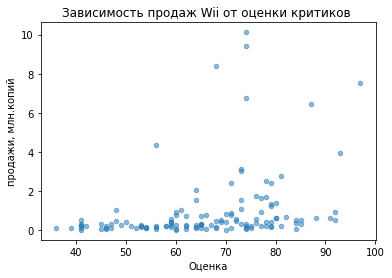

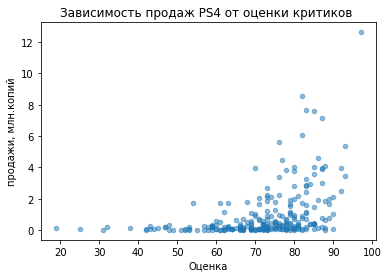

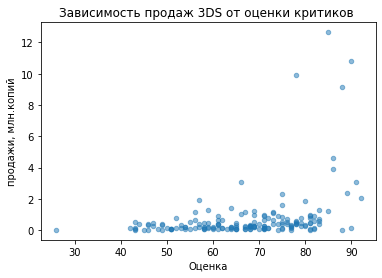

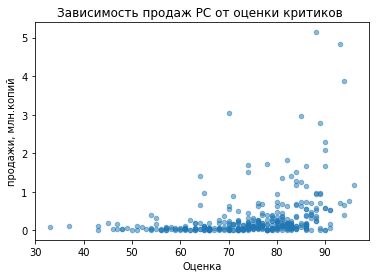

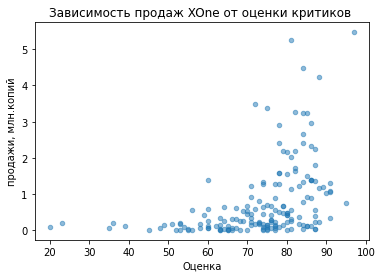

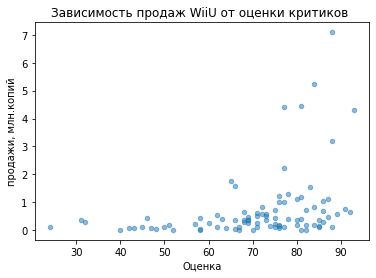

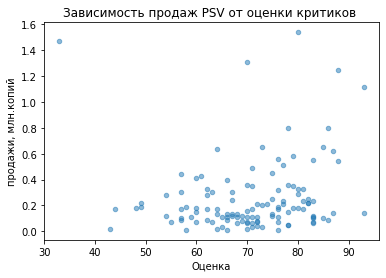

In [57]:
for name in actual_platform_corr['platform']:
    df_actual.query('platform == @name').plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.5,
                       title=f'Зависимость продаж {name} от оценки критиков ').set(
                       xlabel='Оценка', ylabel='продажи, млн.копий');
    

Мы видим, что есть тенденция высоких продаж при высокой оценке игры критиками, она выражена гораздо ярче: мы видим четкие всплески продаж у игр с высокой оценкой.

**Вывод**

Объемы продаж зависят и от оценок пользователей, и от отценок критиков. Прямой эту зависимость не назовешь, но она четко прослеживается в области высоких оценок, особенно при рассмотрении оценок критиков.

## Общее распределение игр по жанрам.

Продажи в разрезе платформ и жанров:

In [58]:
# по актуальным платформам
ganre_pivot_total = df_actual.query('platform in @actual_platform').pivot_table(
                       index='genre', columns = 'platform', 
                       values = 'total_sales', aggfunc = 'sum').sum(axis = 1).sort_values(ascending=False)
ganre_pivot_total

genre
Action         633.63
Shooter        477.38
Sports         313.35
Role-Playing   259.22
Misc           212.30
Racing         118.43
Platform       112.49
Fighting        76.32
Simulation      61.68
Adventure       46.90
Strategy        28.29
Puzzle          10.36
dtype: float64

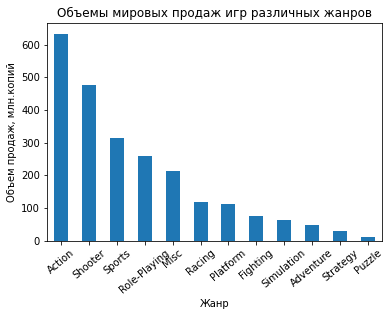

In [59]:
ganre_pivot_total.plot.bar(rot=40).set(
                       title = 'Объемы мировых продаж игр различных жанров',
                       xlabel = "Жанр", ylabel = "Объем продаж, млн.копий" );

Посмотрим сколько это в %:

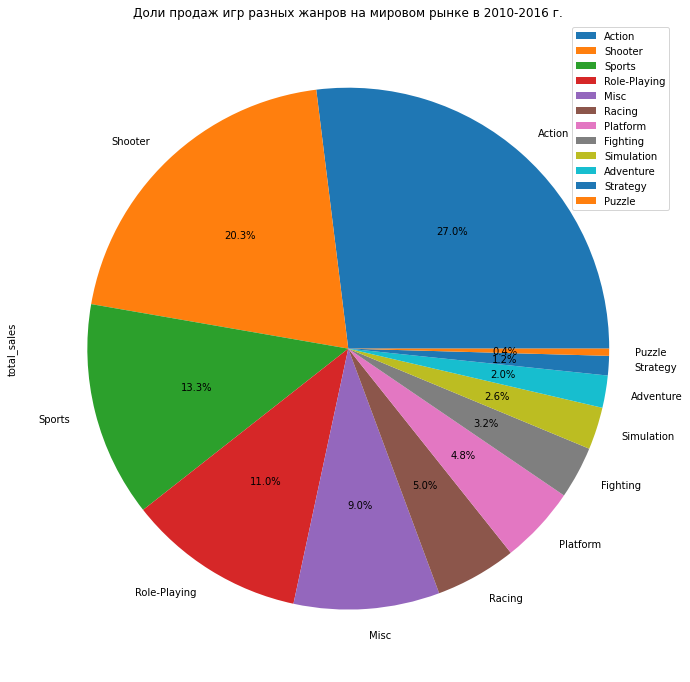

In [60]:
ganre_pivot_total = ganre_pivot_total.reset_index()
ganre_pivot_total.columns = ['genre', 'total_sales']
ganre_pivot_total.plot(kind = 'pie', y ='total_sales', autopct='%1.1f%%', figsize= (12,12),
                         title = 'Доли продаж игр разных жанров на мировом рынке в 2010-2016 г.',  
                         labels = ganre_pivot_total['genre']);


Рассмотрим подробнее распределение продаж по жанрам в разрезе лет (объем продаж, медиану и среднее):


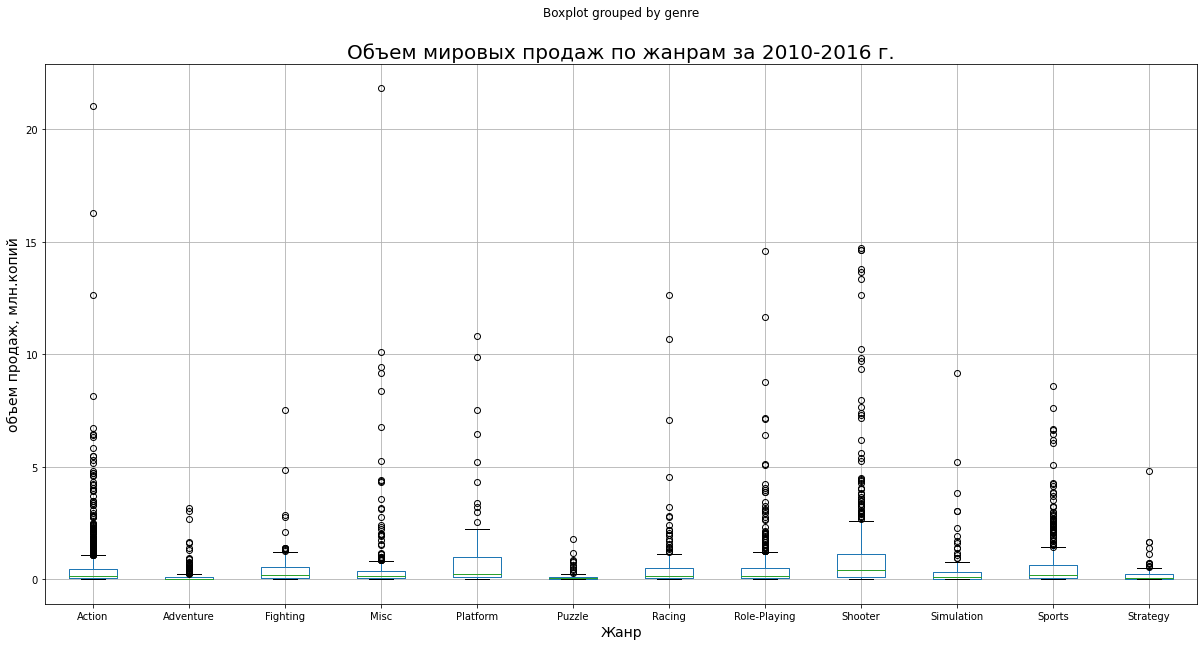

In [61]:
#продажи по жанрам в целом

df_actual.query('platform in @actual_platform').boxplot(
                column='total_sales', by='genre', figsize=(20, 10))
plt.title('Объем мировых продаж по жанрам за 2010-2016 г.', size=20)
plt.xlabel('Жанр', size=14)
plt.ylabel('объем продаж, млн.копий', size=14)
plt.show()

In [62]:
#объем продаж по жанрам
df_actual.query('platform in @actual_platform').pivot_table(
                       index='year_of_release', columns = 'genre', 
                       values = 'total_sales', aggfunc = 'sum')

genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
year_of_release,,,,,,,,,,,,
2010,90.79,6.97,12.12,82.14,26.04,1.97,31.73,32.40,74.78,13.63,80.66,11.20
2011,107.30,12.23,20.07,46.01,26.14,3.60,33.20,45.91,97.87,13.20,53.14,4.46
2012,115.03,4.80,8.84,21.58,18.37,1.62,13.61,36.05,71.75,13.30,29.62,2.57
2013,121.35,5.40,7.07,25.04,23.85,0.96,12.37,43.42,62.04,8.42,40.54,6.10
2014,97.15,5.52,15.85,23.36,8.81,1.49,16.66,45.62,65.21,5.58,45.06,0.98
2015,71.90,8.16,7.90,11.57,6.05,0.71,8.07,37.64,67.51,5.66,40.84,1.85
2016,30.11,3.82,4.47,2.60,3.23,0.01,2.79,18.18,38.22,1.89,23.49,1.13


In [63]:
#медиана продаж по жанрам
df_actual.query('platform in @actual_platform').pivot_table(
                       index='year_of_release', columns = 'genre', 
                       values = 'total_sales', aggfunc = 'median')

genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
year_of_release,,,,,,,,,,,,
2010,0.27,0.06,0.43,0.20,0.26,0.05,0.20,0.26,0.24,0.18,0.22,0.15
2011,0.21,0.08,0.30,0.15,0.22,0.08,0.17,0.32,0.38,0.09,0.18,0.06
2012,0.26,0.04,0.24,0.21,0.15,0.02,0.24,0.28,0.42,0.20,0.33,0.06
2013,0.23,0.05,0.19,0.23,0.39,0.10,0.34,0.18,0.34,0.09,0.41,0.21
2014,0.21,0.05,0.13,0.17,0.83,0.05,0.17,0.11,0.66,0.12,0.46,0.06
2015,0.07,0.03,0.10,0.19,0.10,0.04,0.15,0.11,0.93,0.20,0.12,0.04
2016,0.05,0.02,0.08,0.04,0.10,0.01,0.05,0.12,0.24,0.03,0.12,0.06


In [64]:
#среднее продаж по жанрам
df_actual.query('platform in @actual_platform').pivot_table(
                       index='year_of_release', columns = 'genre', 
                       values = 'total_sales', aggfunc = 'mean')

genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
year_of_release,,,,,,,,,,,,
2010,0.64,0.21,0.51,0.73,1.37,0.18,0.69,0.72,1.04,0.43,0.58,0.36
2011,0.56,0.28,0.50,0.34,0.93,0.19,0.54,0.87,1.08,0.30,0.52,0.15
2012,0.57,0.13,0.34,0.63,1.67,0.23,0.45,0.67,1.49,0.78,0.62,0.21
2013,0.87,0.18,0.37,0.72,0.70,0.32,0.77,0.68,1.05,0.50,0.84,0.34
2014,0.53,0.08,0.69,0.58,0.88,0.21,0.62,0.51,1.39,0.51,0.85,0.12
2015,0.29,0.15,0.38,0.30,0.47,0.12,0.45,0.48,1.99,0.38,0.69,0.12
2016,0.17,0.07,0.28,0.08,0.22,0.01,0.12,0.34,0.81,0.11,0.49,0.09


Заметно, что в течение нескольких лет объемы продаж, медиана и среднее у разных жанров значительно меняются.  Чтобы понять динамику продаж последних лет и выделить приоритетные жанры, сфокусируемся на последних 3 годах:

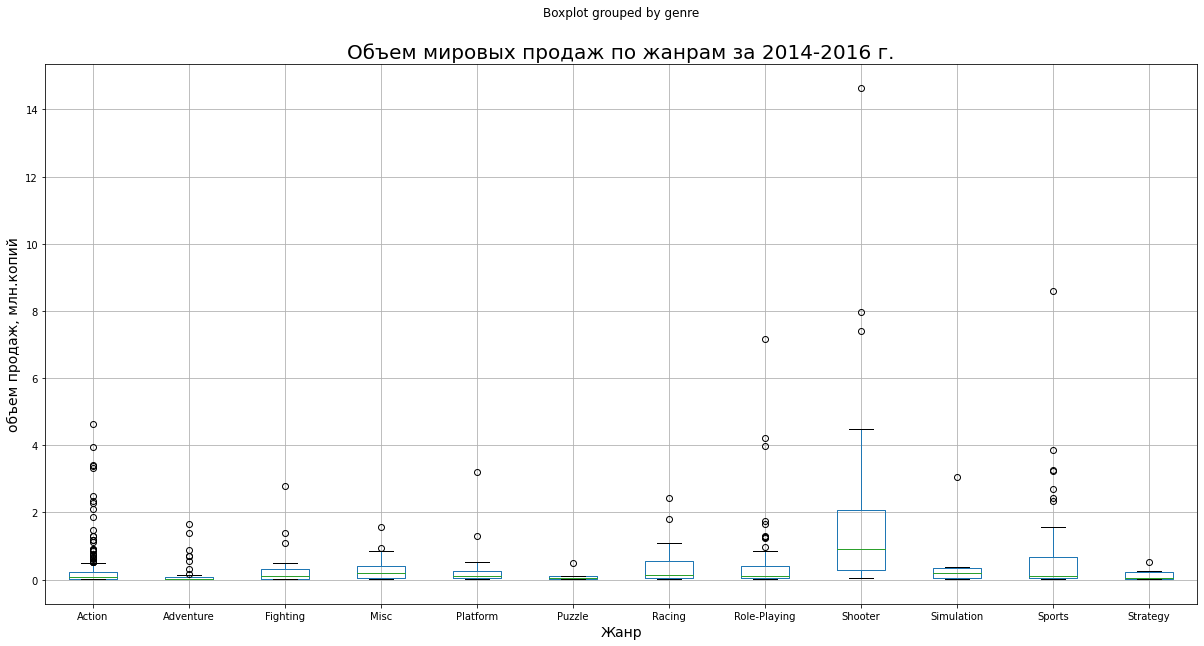

In [65]:
# выборка за последние три года

df_actual.query('platform in @actual_platform and 2014 < year_of_release < 2016' ).boxplot(
                column='total_sales', by='genre', figsize=(20, 10))
plt.title('Объем мировых продаж по жанрам за 2014-2016 г.', size=20)
plt.xlabel('Жанр', size=14)
plt.ylabel('объем продаж, млн.копий', size=14)
plt.show()

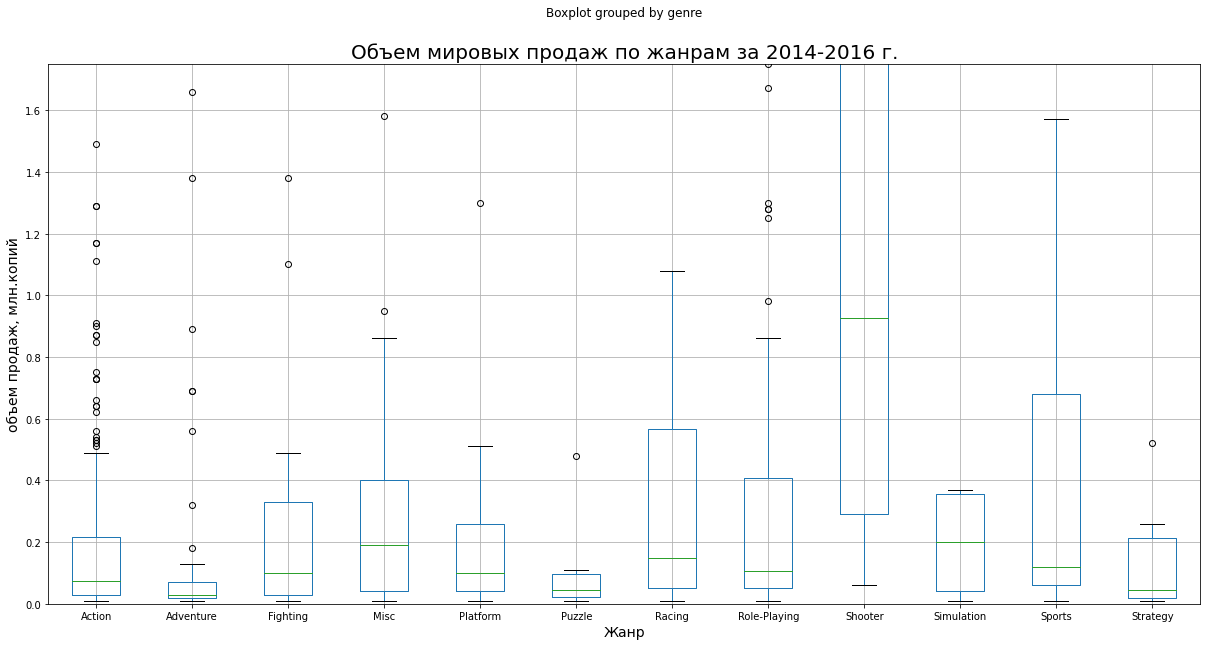

In [66]:
# то же, область медианы

df_actual.query('platform in @actual_platform and 2014 < year_of_release < 2016' ).boxplot(
                column='total_sales', by='genre', figsize=(20, 10)).set(ylim = (0, 1.75))
plt.title('Объем мировых продаж по жанрам за 2014-2016 г.', size=20)
plt.xlabel('Жанр', size=14)
plt.ylabel('объем продаж, млн.копий', size=14)
plt.show()


Посмотрим, что получилось в динамике:

В абсолютном выражении по продажам за 7 лет лидируют жанры Action, Shooter, Sports, Role-Playing и Misc. За последние 3 года лидерами являются все те же жанры Shooter, Action, Sports, Role-Playing, при этом доля продаж  Misc сильно упала.

Но если посмотреть на медианные значения, то можно заметить, что абсолютый лидер по всем значениям , попавшим в межквартильный интервал, медиане и среднему объема продаж - у жанра Shooter, Sport, Role-Playing. Жанр Action менее стабилен в продажах и имеет наибольшее количество выбросов, -т.е. держит продажи в основном за счет небольшого количества очень удачных игр.


**Вывод**
    
    
В абсолютном выражении по продажам за 7 лет лидируют жанры Action, Shooter, Sports, Role-Playing и Misc, и совсем не пользуются популярностью Adventure, Strategy и Puzzle.        


Наиболее перспективными для составления прогноза являются игровые жанры  Shooter, Sports и Role-Playing, которые показывают более стабильные, высокие и предсказуемые значения продаж. 


## Вывод по разделу 3

Полный цикл жизни платформы (на примере топ-5) составляет в среднем 11 лет. Распределение несколько отличается и зависит, скорее всего, от периода, в котором платформа была запущена и скорости разработки новых платформ с инновациями. Но мы видим закономерность- резкий всплеск продаж через год, 5-летний (в среднем) пик, и спад, растянутый на 4-5 лет.


Топ-5 платформ за исследуемое время : PS2, X360, PS3, Wii, DS. Это платформы тройки лидеров- Sony, Nintendo и Microsoft.


Для прогноза наиболее перспективной платформы на 2017 год был выбран актуальный период исходя из среднего периода жизни платфорты в 7 лет.


Рынок компьютерных игр, который начал расти в начале 90-х и достиг своего пика в 2008-2009 годах, к концу 2016 года на спаде. Возможно из-за пресыщения , возможно из-за отсутствия существенных инноваций, которые дали бы толчок развитию нового скачка. Перспективных новых платформ, которые показывали бы тенденцию к росту, нет, поэтому стоит остановиться на тех, кто относительно молод и показывает наибольшие из имеющихся объемы продаж: PS4 - 69.25 млн., XOne -26.15 млн. и 3DS - 15.4 млн. До появления новой платформы они позволят магазину поддерживать бюджет.


Объемы продаж зависят и от оценок пользователей, и от отценок критиков. Прямой эту зависимость не назовешь, но она четко прослеживается в области высоких оценок, особенно при рассмотрении оценок критиков.


В абсолютном выражении по продажам за 7 лет лидируют жанры Action, Shooter, Sports, Role-Playing и Misc, и совсем не пользуются популярностью Adventure, Strategy и Puzzle.

Наиболее перспективными для составления прогноза на 2017 год являются игровые жанры Shooter, Sports и Role-Playing, которые показывают более стабильные, высокие и предсказуемые значения продаж.

# Портрет пользователя каждого региона


## Самые популярные платформы (топ-5). 


Вычислим наиболее предпочтительные платформы в разных регионах: сгруппируем данные актуального периода по выжившим платформам и их продажам, и построим диаграммы:


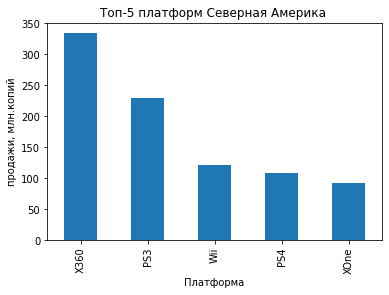

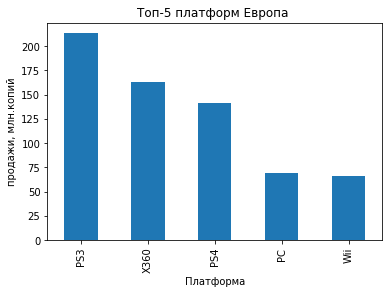

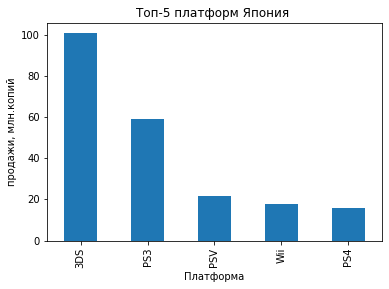

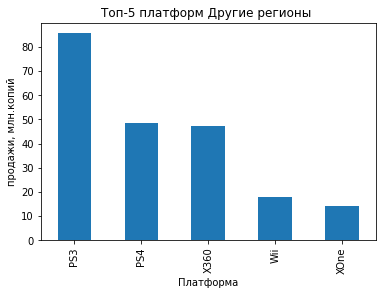

In [67]:
regions = {'na_sales': 'Северная Америка', 'eu_sales':'Европа', 'jp_sales':'Япония', 'other_sales':'Другие регионы'}

for name in regions:
    df_actual.query('platform in @actual_platform').pivot_table(index='platform', values = name, aggfunc = 'sum').sum(
                                     axis = 1).sort_values(ascending=False).head(5).plot(kind='bar',
                                     title=f'Топ-5 платформ {regions[name]} ').set(
                                     xlabel='Платформа', ylabel='продажи, млн.копий');
    plt.show()

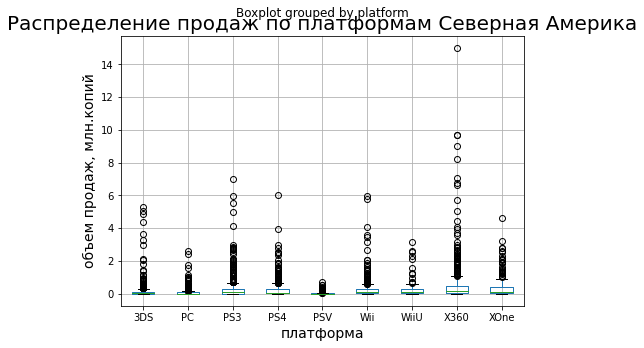

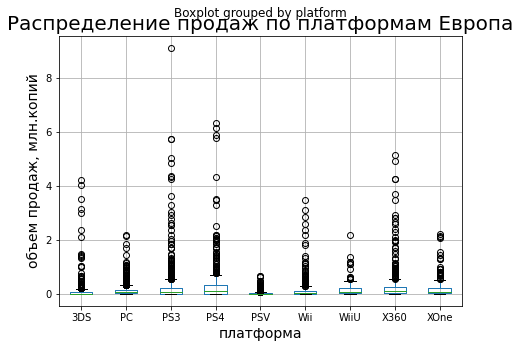

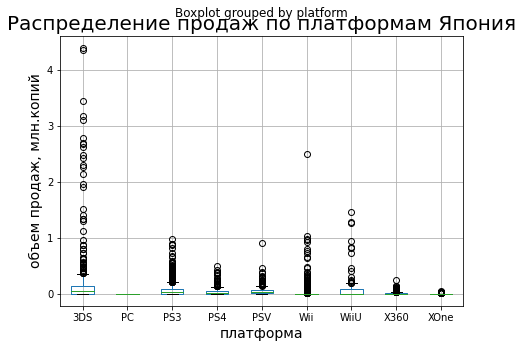

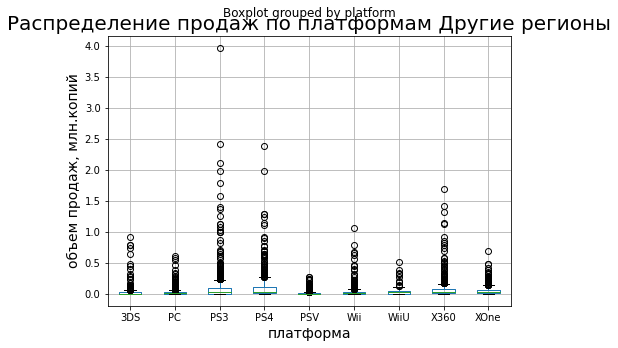

In [68]:
for name in regions:
    df_actual.query('platform  in @actual_platform').boxplot(column= name, by='platform', figsize=(7,5))
    
    plt.title(f'Распределение продаж по платформам {regions[name]}', size=20)
    plt.xlabel('платформа', size=14)
    plt.ylabel('объем продаж, млн.копий', size=14)
    plt.show()

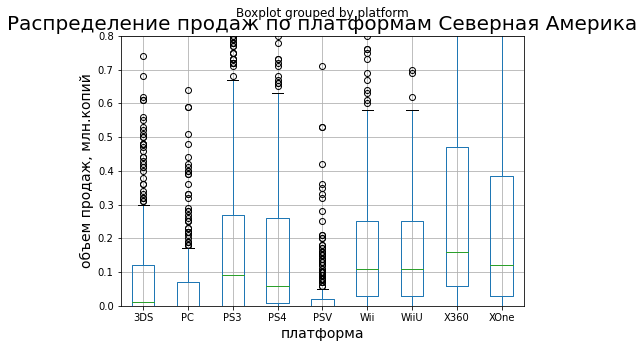

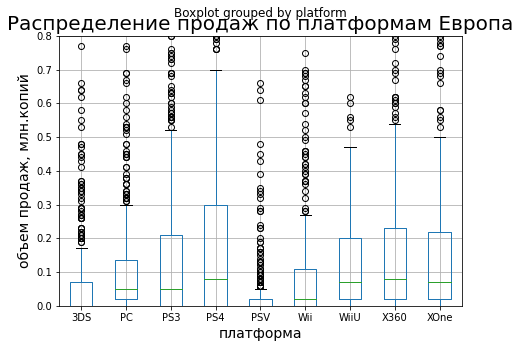

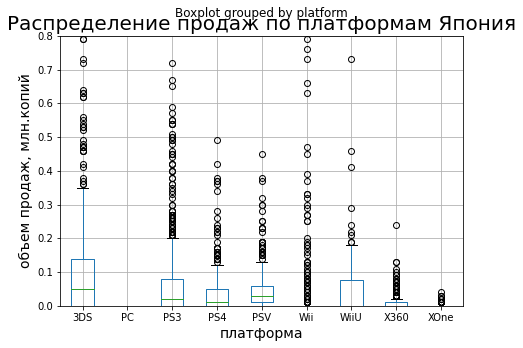

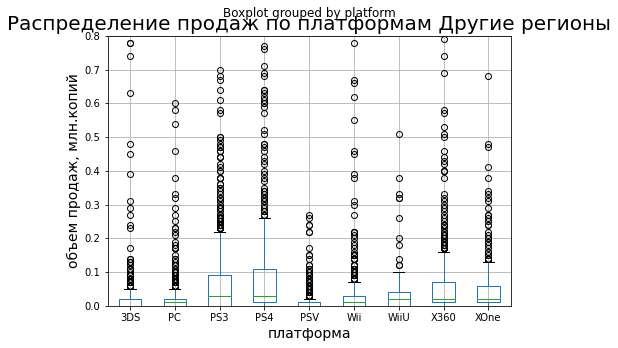

In [69]:
for name in regions:
    df_actual.query('platform  in @actual_platform').boxplot(column= name, by='platform', figsize=(7,5))
   
    plt.ylim(0, 0.8)
    plt.title(f'Распределение продаж по платформам {regions[name]}', size=20)
    plt.xlabel('платформа', size=14)
    plt.ylabel('объем продаж, млн.копий', size=14)
    plt.show()

Если сравнивать абсолютные продажи за 2010-2016г с медианными значениями платформ, то увидим некоторые отклонения, но  в целом можно сказать, что Северная Америка предпочитает разработки Microsoft (X360 и XOne), а также японской Sony (PS3, PS4) и Nintendo (Wii), Европа и остальные регионы повторяют пристрастия Северной Америки, а вот Япония предпочитает отечественные разработки от Sony (PS3, PSV, PS4) и Nintendo (3DS, Wii).

**Вывод**


Северная Америка предпочитает разработки Microsoft (X360 и XOne), а также японской Sony (PS3, PS4) и Nintendo (Wii), Европа и остальные регионы повторяют пристрастия Северной Америки, а вот Япония предпочитает отечественные разработки от Sony (PS3, PSV, PS4) и Nintendo (3DS, Wii).

## Самые популярные жанры (топ-5). 


Посмотрим, чем отличаются пристрастия игроков разных регионов: сгруппируем данные актуального периода по жанрам и регионам и построим диаграммы:

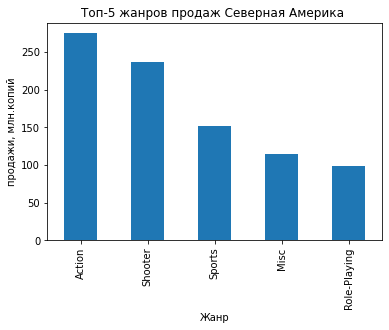

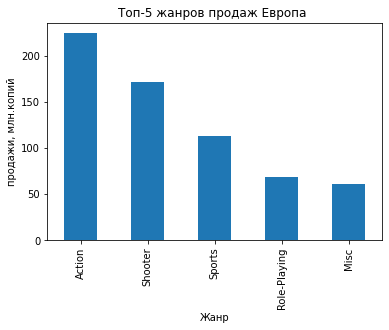

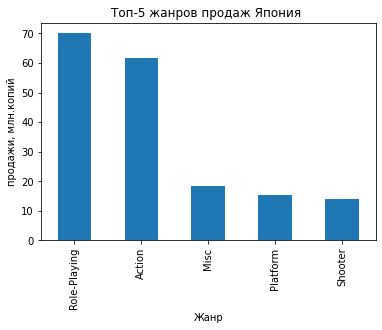

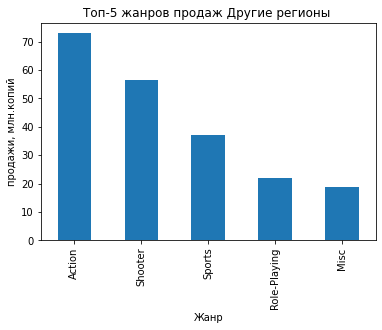

In [70]:
for name in regions:
    df_actual.query('platform in @actual_platform').pivot_table(index='genre', values = name, aggfunc = 'sum').sum(
                                     axis = 1).sort_values(ascending=False).head(5).plot(kind='bar',
                                     title=f'Топ-5 жанров продаж {regions[name]} ').set(
                                     xlabel='Жанр', ylabel='продажи, млн.копий');
    plt.show()

**Вывод**

Самые популярные жанры практически во всех регионах -Action, Shooter, Sports, Role-Playing и Misc. В Японии на первом месте стоят продажи Role-Playing, Action и Misc, кроме этого в стране восходящего солнца любят Platform и Shooter. Многие годы обособленности от остального мира и культура, на которую менее всего оказывало влияние мировое сообщество, сказывается и на играх.

##  Влияние рейтинга ESRB на продажи в отдельном регионе

Для наглядности добавим в df_actual колонку с расшифровкой рейтинга ESRB.


In [71]:
rating_dict = [{
'EC':'EC (3+)',
'E':'E (6+)',
'E10+':'E (10+)',   
'T':'T (13+)',
'M':'M (17+)',
'AO':'AO (только для взрослых)',
'K-A':'E (6+ до 1998 года)',
'RP':'Рейтинг ожидается',
'without rating':'Рейтинг не определен'
}]

In [72]:
rating = pd.DataFrame(rating_dict).transpose().reset_index()
rating.columns = ['rating','description']


df_actual = df_actual.merge(rating )
df_actual.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,description
0,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.00,6.30,E,21.82,E (6+)
1,Mario Kart 7,3DS,2011,Racing,5.03,4.02,2.69,0.91,85.00,8.20,E,12.65,E (6+)
2,Super Mario 3D Land,3DS,2011,Platform,4.89,3.00,2.14,0.78,90.00,8.40,E,10.81,E (6+)
3,Gran Turismo 5,PS3,2010,Racing,2.96,4.82,0.81,2.11,84.00,7.50,E,10.70,E (6+)
4,New Super Mario Bros. 2,3DS,2012,Platform,3.66,3.14,2.47,0.63,78.00,7.20,E,9.90,E (6+)


In [73]:
df_actual['description'].value_counts()

Рейтинг не определен    2164
E (6+)                   938
T (13+)                  847
M (17+)                  719
E (10+)                  603
EC (3+)                    5
Рейтинг ожидается          1
Name: description, dtype: int64

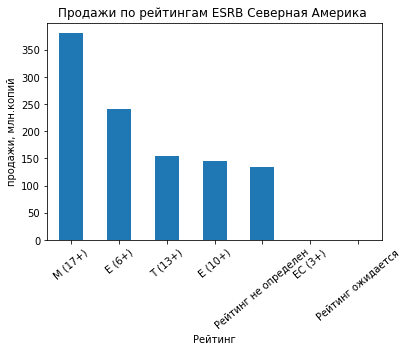

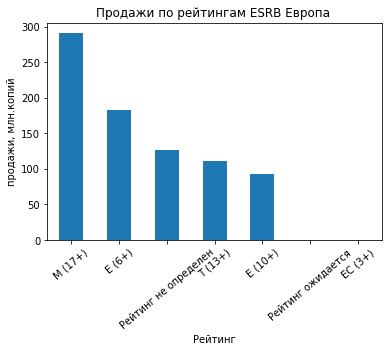

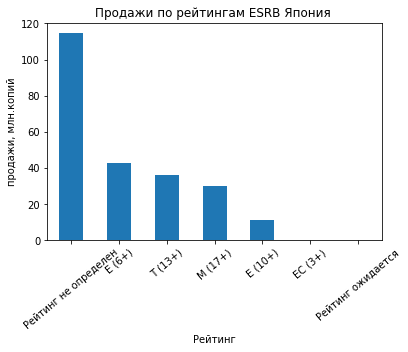

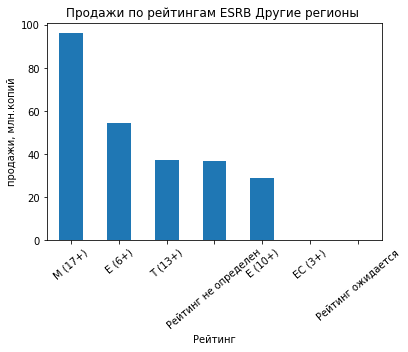

In [74]:
for name in regions:
    df_actual.query('platform in @actual_platform').pivot_table(index='description', values = name, aggfunc = 'sum').sum(
                                     axis = 1).sort_values(ascending=False).plot(kind='bar', rot=40,
                                     title=f'Продажи по рейтингам ESRB {regions[name]} ').set(
                                     xlabel='Рейтинг', ylabel='продажи, млн.копий');
    plt.show()

Чтобы посмотреть распределения продаж внутри каждого рейтинга, построим боксплот:

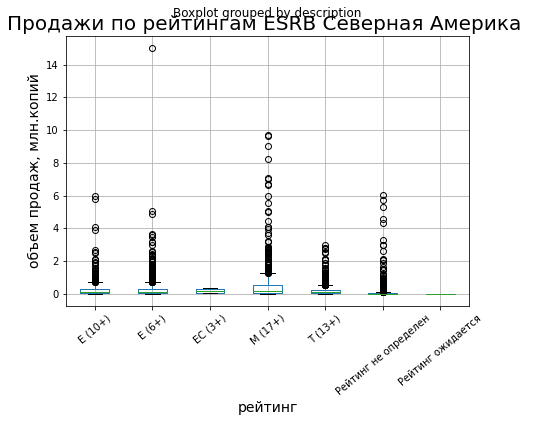

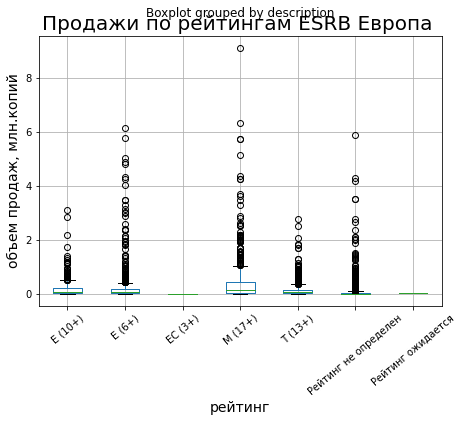

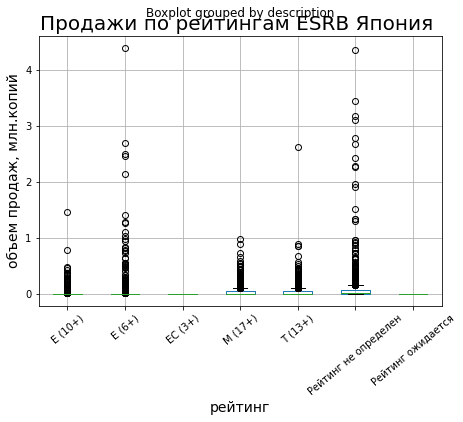

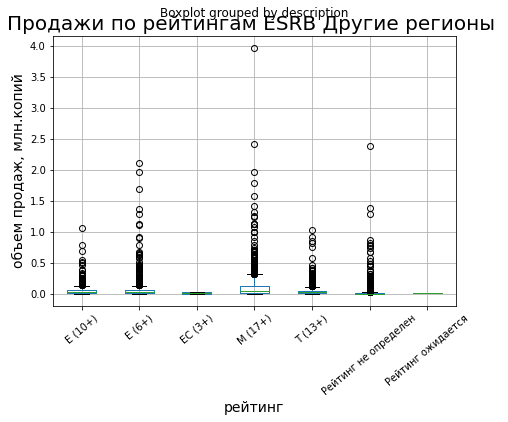

In [75]:
for name in regions:
    df_actual.query('platform in @actual_platform').boxplot(
                                     column= name, by='description', figsize=(7,5),rot=40)
    
    plt.title(f'Продажи по рейтингам ESRB {regions[name]} ', size=20)
    plt.xlabel('рейтинг', size=14)
    plt.ylabel('объем продаж, млн.копий', size=14)
    plt.show()

.. и поближе - область медианы:

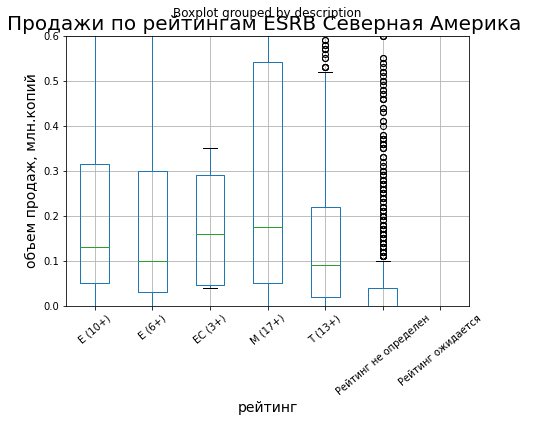

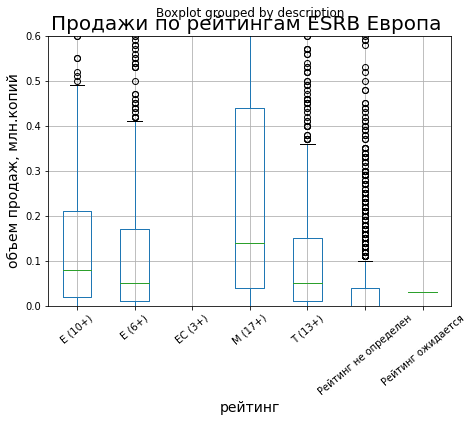

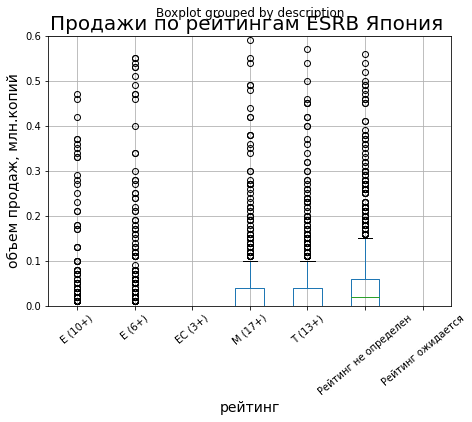

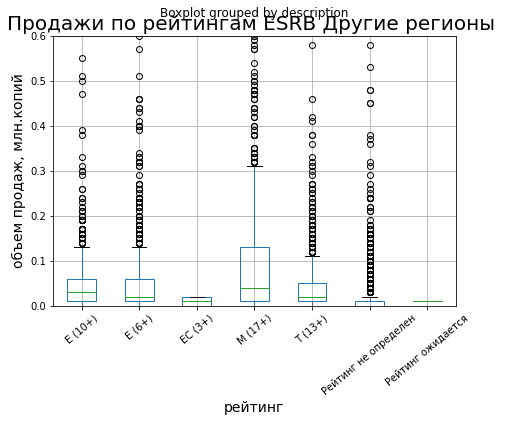

In [76]:
for name in regions:
    df_actual.query('platform in @actual_platform').boxplot(
                                     column= name, by='description',rot=40, figsize=(7,5))
    
    plt.title(f'Продажи по рейтингам ESRB {regions[name]} ', size=20)
    plt.ylim(0, 0.6)
    plt.xlabel('рейтинг', size=14)
    plt.ylabel('объем продаж, млн.копий', size=14)
    plt.show()

Во всех регионах кроме Японии наиболее продаваемыми в 2010-2016г были игры с рейтингом M(17+), затем в порядке убывания - E(6+), T(13+) и E(10+). Если посмотреть на медианные значения, то картина будет несколько другая: на первом месте по-прежнему остается категория M(17+), а у рейтинга  T(13+) объем продаж оказывается сформирован в основном за счет нескольких успешных игр, а медианное значение -самое низкое из рассматриваемых категорий. 

Японский рынок отличается. В абсолютном значении наибольшие продажи за 2010-2016г принесли игры категории E(6+), а затем уже T(13+), M(17+) и E(10+). Но на боксплоте видно, что медианы продаж всех категорий на нуле, то есть практически все объемы продаж сформированы за счет выбросов. То есть японский рынок- непредсказуем , но есть некоторая тенденция в предпочтениях игр категории E(6+), и они отличаются от остального мирового рынка.



**Вывод**

Во всех регионах кроме Японии наиболее продаваемыми являются игры с рейтингом 17+. Японский рынок более непредсказуем, и медианные значения продаж во всех категориях находятся на нуле (многие игры "не зашли" потребителю и не вышли на мировой рынок), наибольшие продажи приносят игры категории 6+ за счет наиболее успешных игр-выбросов в продажах. 

## Вывод по разделу 4

Мировой рынок компьютерных игр можно разделить на две части: Регионы за исключением Японии (Северная Америка, Европа и прочие), и Япония как таковая.

Мировой рынок, за исключением Японии, предпочитает разработки Microsoft (X360 и XOne), а также японской Sony (PS3, PS4) и Nintendo (Wii). Япония предпочитает отечественные разработки от Sony (PS3, PSV, PS4) и Nintendo (3DS, Wii).


Самые популярные жанры практически во всех регионах -Action, Shooter, Sports, Role-Playing и Misc. В Японии на первом месте стоят продажи Role-Playing, Action и Misc, кроме этого в стране восходящего солнца любят Platform и Shooter. Многие годы обособленности от остального мира и культура, на которую менее всего оказывало влияние мировое сообщество, сказывается и на играх.


Во всех регионах кроме Японии наиболее продаваемыми являются игры с рейтингом  M(17+).  Японский рынок отличается: медианы продаж всех категорий на нуле, то есть практически все объемы  сформированы за счет выбросов.  Японский рынок- непредсказуем , но есть некоторая тенденция в предпочтениях игр категории E(6+), и они отличаются от остального мирового рынка.

# Проверка гипотез:


Для проверки гипотез сравним данные за актуальный период, которые сохранены в переменной df_actual.

Для анализа будем использовать t-критерий Стьюдента, поскольку сравниваемые выборки независимы между собой.

Поскольку оценки имеют фиксированные шкалы, удалять выбросы не будем, но очистим данные от пропусков. 

## Средние пользовательские рейтинги платформ Xbox One и PC одинаковые


**Сформулируем гипотезы:**

* Н0: средние пользовательские рейтинги платформ Xbox One и PC равны
* Н1: средние пользовательские рейтинги платформ Xbox One и PC не равны


In [77]:
#выборки пользовательских рейтингов по платформам, очищенные от пропусков:
test_XOne = df_actual.query('platform == "XOne" and user_score.notna()')['user_score']
test_PC = df_actual.query('platform == "PC" and user_score.notna()')['user_score']

In [78]:
alpha = 0.05
results = st.ttest_ind(test_PC,test_XOne)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.980998110649032
Не получилось отвергнуть нулевую гипотезу


С вероятностью в 94% такой результат может быть получен случайно. Это слишком большое значение, которое гораздо больше установленного нами уровня значимости. Следовательно, с очень большой долей вероятности значимых различий между средними пользовательскими рейтингами нет.

**Вывод**

Гипотеза о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковы, не опровергнута

## Средние пользовательские рейтинги жанров Action и Sports разные

**Сформулируем гипотезы:**

* Н0: средние пользовательские рейтинги жанров Action и Sport равны
* Н1: средние пользовательские рейтинги жанров Action и Sport не равны


In [79]:
#выборки пользовательских рейтингов по платформам, очищенные от пропусков:
test_Action = df_actual.query('genre == "Action" and user_score.notna()')['user_score']
test_Sports = df_actual.query('genre == "Sports" and user_score.notna()')['user_score']

In [80]:
alpha = 0.05
results = st.ttest_ind(test_Action, test_Sports)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 7.839124224330308e-19
Отвергаем нулевую гипотезу


Разница не случайна, есть значимые различия между выборками, следовательно средние пользовательские рейтинги отличаются.

**Вывод**

Средние пользовательские рейтинги жанров Action и Sports разные.

## Вывод по разделу 5

Средние пользовательские рейтинги платформ Xbox One и PC одинаковы.

Средние пользовательские рейтинги жанров Action и Sports различаются.

# Общий вывод

Представленные для анализа данные содержат информацию исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы за 1980-2016 годы.

В результате предобработки данных:

- наименования стоблцов приведены к нижнему регистру
- удалены строки с пропусками данных в столбцах name и rating (2 строки), year_of_release (269 строк)
- значения user_score, равные 'tbd' (To Be Determined) изменено на пропуски значений (значение nan)
- пропуски значений столбца rating заменены на значение 'without rating'
- подсчитаны и сохранены в столбце total_sales суммарные продажи во всех регионах.
- Пропуски значений столбца user_score и critic_score оставлены без изменений во избежание искажений результатов корреляционного анализа и стат-тестов.

Результат анализа:

Полный цикл жизни платформы (на примере топ-5) составляет в среднем 11 лет. Распределение несколько отличается и зависит, скорее всего, от периода, в котором платформа была запущена и скорости разработки новых платформ с инновациями. Но мы видим закономерность- резкий всплеск продаж через год, 5-летний (в среднем) пик, и спад, растянутый на 4-5 лет.

Топ-5 платформ за исследуемое время : PS2, X360, PS3, Wii, DS. Это платформы тройки лидеров- Sony, Nintendo и Microsoft.
Для прогноза наиболее перспективной платформы на 2017 год был выбран актуальный период исходя из среднего периода жизни платфорты в 7 лет.


Рынок компьютерных игр, который начал расти в начале 90-х и достиг своего пика в 2008-2009 годах, к концу 2016 года находится на спаде. Возможно из-за пресыщения , возможно из-за отсутствия существенных инноваций, которые дали бы толчок развитию нового скачка. Перспективных новых платформ, которые показывали бы тенденцию к росту, нет, поэтому стоит остановиться на тех, кто относительно молод и показывает наибольшие из имеющихся объемы продаж: это PS4 , XOne и 3DS. До появления новой платформы они позволят магазину поддерживать бюджет.

При планировании продаж необходимо учитывать следующие факторы:

 - объемы продаж зависят и от оценок пользователей, и от оценок критиков: она четко прослеживается в области высоких оценок, особенно при рассмотрении оценок критиков.


 - Наиболее перспективными для составления прогноза являются игровые жанры  Shooter, Sports и Role-Playing, которые показывают более стабильные, высокие и предсказуемые значения продаж. 


 - рынок компьютерных игр разных регионов имеет свои особенности, а именно:
 
     - Мировой рынок, за исключением Японии, предпочитает разработки Microsoft (X360 и XOne), а также японской Sony (PS3, PS4) и Nintendo (Wii). Япония предпочитает отечественные разработки от Sony (PS3, PSV, PS4) и Nintendo (3DS, Wii).
     
     - Самые популярные жанры практически во всех регионах -Action, Shooter, Sports, Role-Playing и Misc. В Японии на первом месте стоят продажи Role-Playing, Action и Misc, кроме этого в стране восходящего солнца любят Platform и Shooter. Многие годы обособленности от остального мира и культура, на которую менее всего оказывало влияние мировое сообщество, сказывается и на играх.
            
     - Во всех регионах кроме Японии наиболее продаваемыми являются игры с рейтингом 17+. В Японии наибольшие продажи в первую очередь приносят игры категории 6+, но японский рынок непредсказуем, и все объемы продаж сформированы за счет отдельных, очень хорошо продаваемых игр. Большинство не продается вовсе.
  

Были проведены статистические t-тесты для проверки гипотез по сравнению пользовательских рейтингов платформ Xbox One и PC, а также жанров Action и Sports. Результаты тестов:

 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковы.

 - Средние пользовательские рейтинги жанров Action и Sports различаются.